### Membres du groupe 
| Prénoms       |     Nom         |   
| ------------- |: -------------: |
| Amadou lamarana      | DIALLO               |
| Aboubacar Sidiki        |        SIDIBE        |

## Projet Machine Learning .. 

Le dataset utilisé provient de airbnb.. sur le site : http://insideairbnb.com/get-the-data.html

Nous allons l'importer  et créer le dataframe pour l'ojectif du projet de Machine Learning . 


### Objectif du projet



##### L'objectif est la prédiction des prix des logement airbnb sur Paris  Ile de France  en suivant les étapes suivantes

#### Etape 1: Importation des modules .. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sns

## 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

## RGRESSION LINEAR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler

### Lecture des données .. listings.csv

In [2]:
df_brut = pd.read_csv("listings.csv", engine="python")

print("Le dataframe contient {} enregistrements (listings Airbnb) et {} colunnes".format(df_brut.shape[0], df_brut.shape[1]))

pd.set_option('display.max_columns', len(df_brut.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
df_brut.head()

Le dataframe contient 63090 enregistrements (listings Airbnb) et 74 colunnes


id                        listing_url       scrape_id last_scraped  \
0  2577  https://www.airbnb.com/rooms/2577  20210410122610   2021-04-14   
1  3109  https://www.airbnb.com/rooms/3109  20210410122610   2021-04-13   
2  5396  https://www.airbnb.com/rooms/5396  20210410122610   2021-04-16   
3  7397  https://www.airbnb.com/rooms/7397  20210410122610   2021-04-16   
4  7964  https://www.airbnb.com/rooms/7964  20210410122610   2021-04-13   

                                name  \
0   Loft for 4 by Canal Saint Martin   
1                       zen and calm   
2     Explore the heart of old Paris   
3   MARAIS - 2ROOMS APT - 2/4 PEOPLE   
4  Large & sunny flat with balcony !   

                                         description  \
0  100 m2 loft (1100 sq feet) with high ceiling, ...   
1  <b>The space</b><br />I bedroom appartment in ...   
2  Cozy, well-appointed and graciously designed s...   
3  VERY CONVENIENT, WITH THE BEST LOCATION !<br /...   
4  Very large & nice apartment all for you! <br /...   

                               neighborhood_overview  \
0                                                NaN   
1  Good restaurants<br />very close the Montparna...   
2  You are within walking distance to the Louvre,...   
3                                                NaN   
4                                                NaN   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/09da057c-0120...     2827   
1  https://a0.muscache.com/pictures/baeae9e2-cd53...     3631   
2  https://a0.muscache.com/pictures/52413/f9bf76f...     7903   
3  https://a0.muscache.com/pictures/67928287/330b...     2626   
4  https://a0.muscache.com/pictures/4471349/6fb3d...    22155   

                                  host_url host_name  host_since  \
0   https://www.airbnb.com/users/show/2827    Karine  2008-09-09   
1   https://www.airbnb.com/users/show/3631      Anne  2008-10-14   
2   https://www.airbnb.com/users/show/7903    Borzou  2009-02-14   
3   https://www.airbnb.com/users/show/2626    Franck  2008-08-30   
4  https://www.airbnb.com/users/show/22155     Anaïs  2009-06-18   

                           host_location  \
0  Casablanca, Grand Casablanca, Morocco   
1           Paris, Île-de-France, France   
2             Istanbul, İstanbul, Turkey   
3           Paris, Île-de-France, France   
4           Paris, Île-de-France, France   

                                          host_about host_response_time  \
0  Arrivée à Casablanca il y a 4 ans, je suis amo...       within a day   
1                                                NaN       within a day   
2  We are both journalists based in the Middle Ea...     within an hour   
3  I am a writer,51, author of novels, books of l...     within an hour   
4  Hello ! \r\nOur apartment is great and I am su...                NaN   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                50%                  67%                 f   
1                80%                   0%                 f   
2               100%                  92%                 f   
3               100%                  83%                 t   
4                NaN                  NaN                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/pictures/user/17fe6...   
1  https://a0.muscache.com/im/users/3631/profile_...   
2  https://a0.muscache.com/im/users/7903/profile_...   
3  https://a0.muscache.com/im/pictures/user/58f00...   
4  https://a0.muscache.com/im/users/22155/profile...   

                                    host_picture_url  \
0  https://a0.muscache.com/im/pictures/user/17fe6...   
1  https://a0.muscache.com/im/users/3631/profile_...   
2  https://a0.muscache.com/im/users/7903/profile_...   
3  https://a0.muscache.com/im/pictures/user/58f00...   
4  https://a0.muscache.com/im/users/22155/profile...   

             host_neighbourhood  host_listings_count  \
0             

### DESCRIPTION DES COLONNES


- host_since : date that the host first joined Airbnb
- host_response_time :  average amount of time the host takes to reply to messages
- host_response_rate :  proportion of messages that the host replies to
- host_is_superhost  :  whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb
- host_listings_count :  how many listings the host has in total
- host_identity_verified :  whether or not the host has been verified with id
- neighbourhood_cleansed :  the paris borough the property is in
- property_type :  type of property, e.g. house or flat
- room_type : type of listing, e.g. entire home, private room or shared room
- accommodates : how many people the property accommodates
- bathrooms : number of bathrooms
- bedrooms : number of bedrooms
- beds : number of beds
- bed_type : type of bed, e.g. real bed or sofa-bed
- amenities : list of amenities
- price : nightly advertised price (the target variable)
- minimum_nights : the minimum length of stay
- maximum_nights : the maximum length of stay
- calendar_updated : when the host last updated the calendar
- availability_30 : how many nights are available to be booked in the next 30 days
- availability_60 : how many nights are available to be booked in the next 60 days
- availability_90 : how many nights are available to be booked in the next 90 days
- availability_365 : how many nights are available to be booked in the next 365 days
- number_of_reviews : the number of reviews left for the property
- number_of_reviews_ltm : the number of reviews left for the property in the last twelve months
- first_review : the date of the first review
- last_review : the date of the most recent review
- review_scores_rating : guests can score properties overall from 1 to 5 stars
- review_scores_accuracy : guests can score the accuracy of a property's description from 1 to 5 stars
- review_scores_cleanliness : guests can score a property's cleanliness from 1 to 5 stars
- review_scores_checkin : guests can score their check-in from 1 to 5 stars
- review_scores_communication : guests can score a host's communication from 1 to 5 stars
- review_scores_location : guests can score a property's location from 1 to 5 stars
- review_scores_value : guests can score a booking's value for money from 1 to 5 stars
- instant_bookable : whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)
- reviews_per_month : calculated field of the average number of reviews left by guest each month

In [3]:
def graphic(df):
    """
    input: df,
    ouput: Graph des NaN des colonnes
    """
    plt.rcParams['figure.figsize'] = (15, 10)
    pd.DataFrame(df.isna().mean().round(4) * 100, columns=['NaN en %']).plot(kind='bar')
    plt.show()

>Nous notons une forte présence des missing values dans le dataset

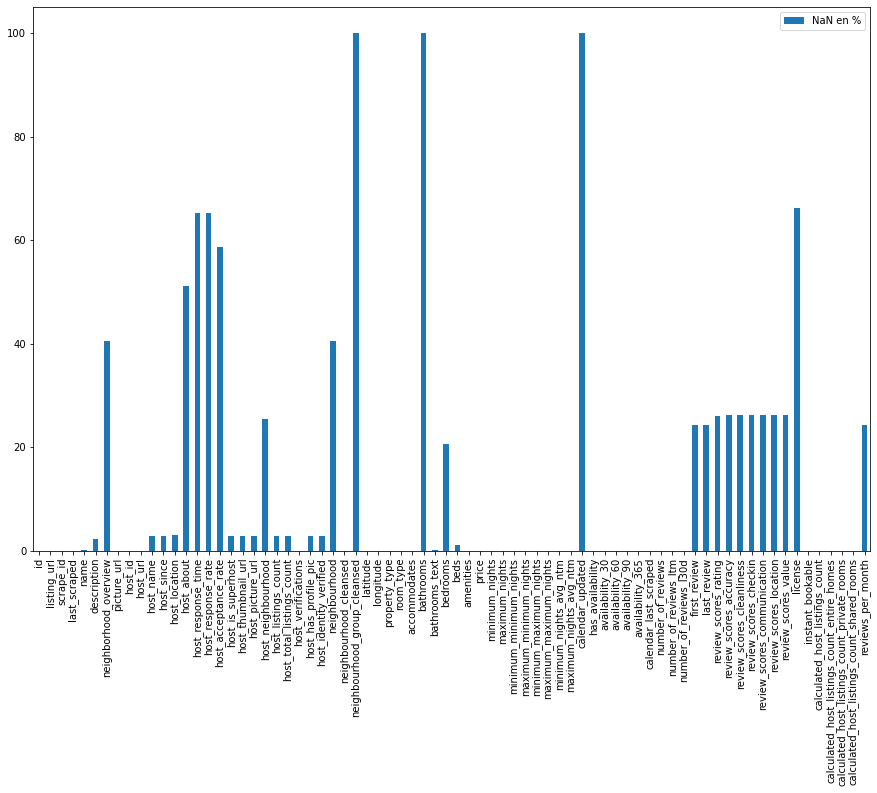

In [4]:
graphic(df_brut)

## ETAPE 2: Suppression des colonnes textuelles . 

> Ces colonnes ne sont pas assez pertinente pour la prédiction du prix de la location.D'autres colonnes seront supprimées à cause des missing values dans le dataset..

In [5]:
## colonnes textuelles qui nous pouvons supprimer .
col_to_remove=['listing_url','scrape_id','last_scraped','name','description','neighborhood_overview','picture_url', 'host_id','host_name',
                  'host_url','host_location','host_about','host_thumbnail_url', 'host_picture_url','host_neighbourhood','host_verifications',
                  'host_has_profile_pic','neighbourhood_cleansed','neighbourhood_group_cleansed','calendar_updated','calendar_last_scraped',
                  'bathrooms','bathrooms_text'
              ]

> Nous allons ajouter et supprimer les colonnes suivantes dû au nombre élevé des missing values  et la licence aussi, c'est des informations qui ne mettent participe pas à l'élaboration du prix .. plus de 2/3 du dataset n'on pas de licence

In [6]:
col_to_remove = col_to_remove +['license','neighbourhood','host_response_time','host_response_rate','host_acceptance_rate']

In [7]:
df = df_brut.drop(columns=col_to_remove, axis=1)

> Affihage graphe du taux des NaN sur chaque colonne

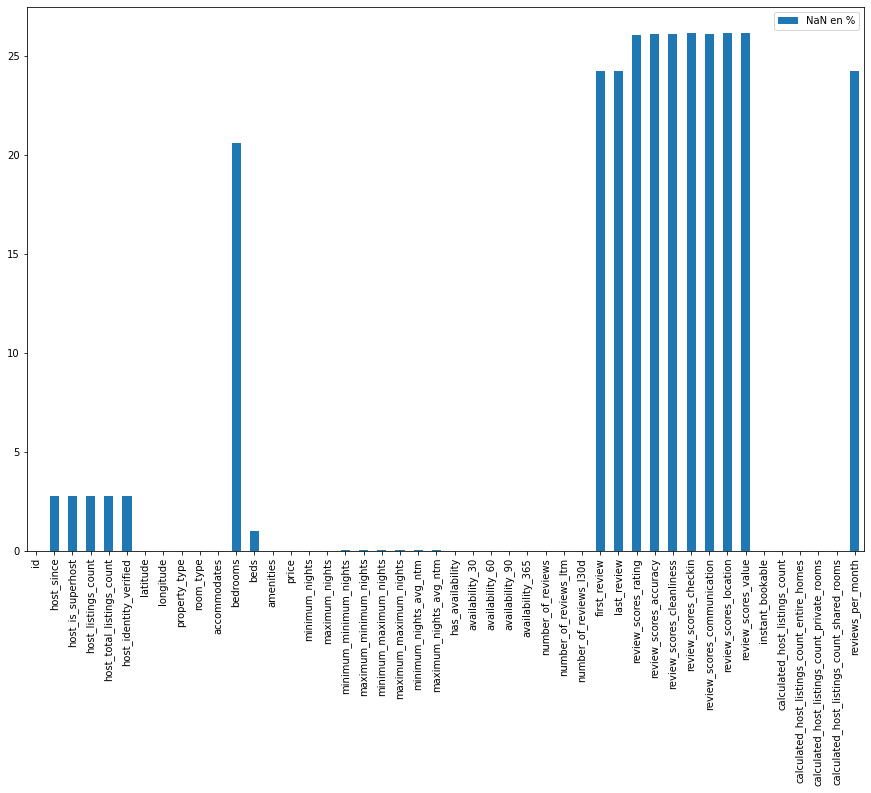

In [8]:
graphic(df)

> Affectation de la colonne id comme index

In [9]:
## Choix de l'index sur id
df.set_index('id', inplace=True)

#### Des colonnes en apparences les mêmes .  host_listings_count et host_total_listings_count

> Nous avons 1754 lignes dont les colonnes host_total_listings_count et host_listings_count sont des NaN .. ce qui est minime par rapport au reste ..C'est les cas ou les valeurs des deux colonnes sont des missing values ( NaN)
<br><br>
> Par la  suite nous allons supprimer une parmi les deux colonnes .. 

In [10]:
print(sum((df.host_listings_count==df.host_total_listings_count)==False))

1754


In [11]:
df.loc[((df.host_listings_count==df.host_total_listings_count)==False)][:3]

host_since host_is_superhost  host_listings_count  \
id                                                        
22158        NaN               NaN                  NaN   
39666        NaN               NaN                  NaN   
64117        NaN               NaN                  NaN   

       host_total_listings_count host_identity_verified  latitude  longitude  \
id                                                                             
22158                        NaN                    NaN  48.87039    2.32273   
39666                        NaN                    NaN  48.85088    2.35683   
64117                        NaN                    NaN  48.85635    2.35592   

                   property_type        room_type  accommodates  bedrooms  \
id                                                                          
22158  Private room in apartment     Private room             2       1.0   
39666           Entire apartment  Entire home/apt             2       1.0   
64117           Entire apartment  Entire home/apt             2       1.0   

       beds                                          amenities    price  \
id                                                                        
22158   1.0  ["Essentials", "Dishes and silverware", "Hair ...  $110.00   
39666   1.0  ["Breakfast", "Essentials", "TV with standard ...  $667.00   
64117   1.0  ["Smoke alarm", "Essentials", "TV with standar...   $95.00   

       minimum_nights  maximum_nights  minimum_minimum_nights  \
id                                                              
22158               2            1125                     2.0   
39666               2             365                     2.0   
64117              30             300                    30.0   

       maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
id                                                                              
22158                     2.0                  1125.0                  1125.0   
39666                     2.0                  1125.0                  1125.0   
64117                    30.0                   300.0                   300.0   

       minimum_nights_avg_ntm  maximum_nights_avg_ntm has_availability  \
id                                                                       
22158                     2.0                  1125.0                t   
39666                     2.0                  1125.0                t   
64117                    30.0                   300.0                t   

       availability_30  availability_60  availability_90  availability_365  \
id                                                                           
22158               29               59               89               364   
39666                1                1                1                 1   
64117                9               39               69               344   

       number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
id                                                                        
22158                 52                      0                       0   
39666                 41                      0                       0   
64117                 66                      0                       0   

      first_review last_review  review_scores_rating  review_scores_accuracy  \
id                                                                             
22158   2012-11-15  2020-01-23                  98.0                    10.0   
39666   2011-03-31  2019-10-06                  96.0                    10.0   
64117   2011-01-05  2018-04-30                  93.0                     9.0   

       review_scores_cleanliness  review_scores_checkin  \
id                                                        
22158                       10.0                   10.0   
39666                       10.0                    9.0   
64117                        9.0        

> De même que les colonnes que les données calculées pendant le scraping. telles que .. calculated_host_listings_count , calculated_host_listings_count_entire_homes. l'annonceur ne prètera pas assez attention pour fixer son prix ..sutout que ces données sont générées lors d'une extraction.

In [12]:

drop_col = ['host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 
'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']
df.drop(drop_col, axis=1, inplace=True)

In [13]:
## Nous allons aussi supprimer les donnéés liées à la localisation .. tels que latitute, longitude .. etc. 
###Car dans un même emplacement peuvenet existé deux listings dont les prix différent largement .. 
#lat_long = df[["latitude","longitude"]]

> **Les colonnes minimums des minimums et des maximums  sont à supprimer..**

In [14]:
sum((df.minimum_nights == df.minimum_minimum_nights) == False)

1832

In [15]:
## Nous allons aussi supprimer les données des sous minimums et des sous maximuns.. 
drop_col2 = ["minimum_minimum_nights","maximum_minimum_nights","minimum_maximum_nights","maximum_maximum_nights","minimum_nights_avg_ntm","maximum_nights_avg_ntm"]
df.drop(drop_col2, axis=1, inplace=True)

> Remplacer les valeurs catégorielles booléenne .. f par 0 et t par 1 dans le dataframe

In [16]:
df.replace({'f':0, 't':1}, inplace=True)

***Transformation des prix***

In [17]:
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(',','')
df.price = df.price.astype('int64')

**Historigramm des colonnes numériques** 

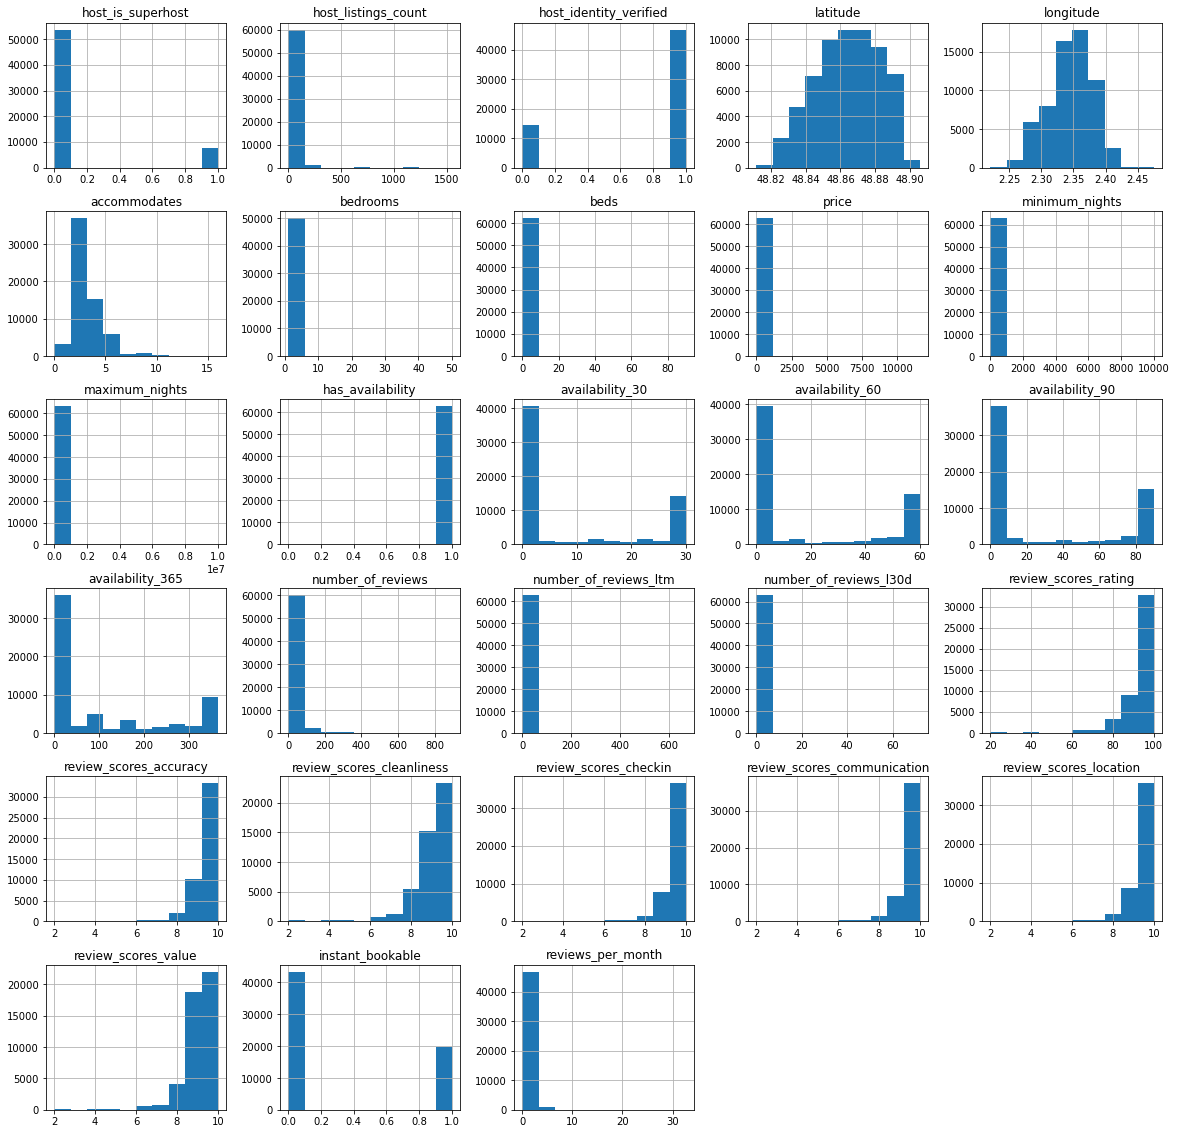

In [18]:
df.hist(figsize=(20,20));

> La disponibilité des hébergements .. sur l'Ile de France .avec 99% de disponibilité des annonces airbnb

In [19]:
df.has_availability.value_counts()  

1    62672
0      418
Name: has_availability, dtype: int64

#### Nous notons une corrélation forte entre les colonnes availability_30, availability_60 ,availability_90,availability_365.. Une seule colonne ne sera conservée...
####  nous gardons availability_90


In [20]:
df.drop(['availability_30','availability_60','availability_365'], axis=1, inplace =True)

> les colonnes <code>number_of_review_ltm et number_of_reviews_l30d</code> sont très corrélées à <code>number_of_reviews </code>.. donc on les supprime.on choisit de supprimer (<code>number_of_review_ltm et number_of_reviews_l30d </code>)

In [21]:
df.drop(['number_of_reviews_ltm','number_of_reviews_l30d'], axis=1, inplace =True)

>Les types de chambres .. 
Nous avons 4 types de chambres, à forte dominance d'appartement 

In [22]:
df.room_type.value_counts()

Entire home/apt    53825
Private room        7498
Hotel room          1358
Shared room          409
Name: room_type, dtype: int64

> **les types de propriété // colonne catégorielle.. à plusieurs classes**

In [23]:
 df.property_type.unique()

array(['Entire loft', 'Entire apartment', 'Private room in apartment',
       'Entire condominium', 'Room in bed and breakfast',
       'Private room in bed and breakfast', 'Entire house',
       'Private room in townhouse', 'Private room in house',
       'Private room in condominium', 'Entire guesthouse',
       'Shared room in apartment', 'Private room in guesthouse',
       'Entire townhouse', 'Entire guest suite', 'Boat',
       'Private room in loft', 'Tiny house', 'Entire villa',
       'Entire floor', 'Private room in guest suite',
       'Entire serviced apartment', 'Room in serviced apartment',
       'Houseboat', 'Room in boutique hotel',
       'Private room in serviced apartment', 'Treehouse', 'Earth house',
       'Entire cottage', 'Private room in nature lodge', 'Entire place',
       'Private room in earth house', 'Entire bed and breakfast',
       'Shared room in igloo', 'Shared room in loft',
       'Private room in chalet', 'Cave', 'Private room in villa',
       'Pr

> Classfication de types de propriété avec 60 classes différentes

In [24]:
dict_property_type ={
     "Entire loft": 'apartment',
     "Entire apartment": 'apartment',
     "Private room in apartment": 'room',
     'Entire condominium': 'apartment',
     'Room in bed and breakfast':'room',
     'Private room in bed and breakfast':'room',
     'Entire house':'house',
     'Private room in townhouse':'room',
     'Private room in house':'room',
     'Private room in condominium':'room',
     'Entire guesthouse':'house',
     'Shared room in apartment':'room',
     'Private room in guesthouse':'room',
     'Entire townhouse':'house',
     'Entire guest suite':'apartment',
     'Boat':'other',
     'Private room in loft':'room',
     'Tiny house':'house',
     'Entire villa':'house',
     'Entire floor':'apartment',
     'Private room in guest suite':'room',
     'Entire serviced apartment':'apartment',
     'Room in serviced apartment':'room',
     'Houseboat':'other',
     'Room in boutique hotel':'room',
     'Private room in serviced apartment':'room',
     'Treehouse':'house',
     'Earth house':'house',
     'Entire cottage':'apartment', 
     'Private room in nature lodge':'room', 
     'Entire place':'house',
     'Private room in earth house':'room', 
     'Entire bed and breakfast':'room',
     'Shared room in igloo':'room', 
     'Shared room in loft':'room',
     'Private room in chalet':'room', 
     'Cave':'other', 
     'Private room in villa':'room',
     'Private room':'room', 
     'Room in hotel':'room', 
     'Shared room in house':'room',
     'Shared room in condominium':'room', 
     'Shared room in townhouse':'room',
     'Entire home/apt':'apartment', 
     'Shared room in tiny house':'room',
     'Room in aparthotel':'room', 
     'Private room in boat':'room',
     'Private room in houseboat':'room', 
     'Dome house':'house',
     'Shared room in bed and breakfast':'room', 
     'Shared room in guesthouse':'room',
     'Private room in hostel':'room', 
     'Shared room in guest suite':'room',
     'Entire bungalow':'house', 
     'Room in hostel':'room', 
     'Shared room in hostel':'room',
     'Private room in cabin':'room', 
     'Shared room in boutique hotel':'room',
     'Shared room in cabin':'room', 
     'Island':'other', 
     'Barn':'other', 
     'Campsite':'other',
     'Shared room in serviced apartment':'other', 
     'Entire chalet':'house',
     'Private room in casa particular':'room', 
     'Camper/RV':'other', 
     'Casa particular':'apartment',
     'Private room in tiny house':'room'
}

In [25]:
dfc= df.copy()

In [26]:
#### Procédons au remplacement des données sur la colonne property_type
df= dfc
df.property_type.replace(dict_property_type,inplace=True)

> Après replacement des données de la colonne property_type .. on maintenant une colonne à 4 classes

In [27]:
df.property_type.value_counts()

apartment    53140
room          9293
house          636
other           21
Name: property_type, dtype: int64

In [28]:
df.columns

Index(['host_since', 'host_is_superhost', 'host_listings_count',
       'host_identity_verified', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_90', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month'],
      dtype='object')

In [29]:
## Nous avons ainsi les types de propriétés .. mais aussi nous y avons une colonne plus spécifique.. c'est le type du logement/

df.room_type.value_counts()

Entire home/apt    53825
Private room        7498
Hotel room          1358
Shared room          409
Name: room_type, dtype: int64

> #### Amenities .. // les commodités .. sur lesquelles les bailleurs et les locataires pretent une attention particulières. 

In [30]:
df.amenities.values

array(['["Essentials", "Kitchen", "Heating", "Host greets you", "Washer", "Wifi", "Dryer", "TV", "Hangers", "Hot water", "Iron", "Dedicated workspace", "Long term stays allowed"]',
       '["Smoke alarm", "Dishes and silverware", "Hair dryer", "Kitchen", "Luggage dropoff allowed", "Paid parking off premises", "Washer", "Children\\u2019s books and toys", "Wifi", "Cooking basics", "Hangers", "Smart lock", "Hot water", "Iron", "Dedicated workspace", "Long term stays allowed"]',
       '["Essentials", "TV with standard cable", "Dishes and silverware", "Hair dryer", "Wifi", "Hangers", "Stove", "Bed linens", "Drying rack for clothing", "Clothing storage: closet", "Toaster", "Washer", "Body soap", "Long term stays allowed", "Refrigerator", "Shampoo", "Smoke alarm", "Hot water kettle", "Heating", "Fire extinguisher", "Cooking basics", "Cleaning products", "Cable TV", "Dedicated workspace", "Kitchen", "Oven", "Host greets you", "Shower gel", "Hot water", "Extra pillows and blankets"]',
       .

In [31]:
def amenities(data_column):
    """
    input: colonne amenities du dataset
    output: une liste sans doublons des amenities 
    """
    amenties_list = list(data_column)
    amenities_list_string = ' '.join(amenties_list)
    amenities_list_string = amenities_list_string.replace('{', '')
    amenities_list_string = amenities_list_string.replace('}', ',')
    amenities_list_string = amenities_list_string.replace('[', '')
    amenities_list_string = amenities_list_string.replace(']', ',')
    amenities_list_string = amenities_list_string.replace('"', '')
    ## creation d'une liste grace à un séparetur ','
    amenities_set = [x.strip() for x in amenities_list_string.split(',')]
    amenities_set = set(amenities_set)
    return list(amenities_set)

In [32]:
amenities(df.amenities)

['',
 'Rituals body soap',
 'Clothing storage: closet',
 'Savon bio body soap',
 'Clothing storage: dresser',
 'Sun loungers',
 'Omnisens Paris conditioner',
 'DE DIETRICH. Four \\u00e0 chaleur tournante. oven',
 'Marshall Stockwell 2 sound system with Bluetooth and aux',
 'Hair dryer',
 'Air conditioning',
 'Proline refrigerator',
 'TV with standard cable',
 'dresser',
 'sans d\\u00e9conner ? conditioner',
 'Onsite restaurant \\u2014 canteenM-open 24/7',
 'Candy refrigerator',
 'Steam room',
 'Dedicated workspace: monitor and desk',
 'Printer',
 'Washer',
 'SONY sound system with aux',
 'Paid parking lot on premises',
 'Clothing storage: wardrobe and walk-in closet',
 'Samsung stainless steel oven',
 'savon de Marseille body soap',
 'Stainless steel oven',
 'Wifi \\u2013 500 Mbps',
 '120\\ HDTV with Netflix',
 'Paid parking garage on premises \\u2013 1 space',
 'Induction stove',
 'Uriage body soap',
 'MONSAVON body soap',
 'Turndown service',
 'Cabasse sound system with aux',
 'Apple

> D'après le site airbnd sur les meilleurs commoditiés qui satifont les clients à savoir sur le wifi, la climatisation, le parking et le stationnement sont les plus demandées. Nous pouvons choisir celles se trouvant dans notre liste .

In [33]:
## liste des commoditiés les plus importantes
best_amenities = [
    'Internet/Pocket wifi',
    'Air Conditioning',
    'Parking',
    'SAMSUNG refrigerator/Frigo SMEG/ freezer refrigerator/Philips refrigerator/siemens refrigerator',
    'Balcony/Patio',
    'Suitable for events',
    'Waterfront/Lake access/Beachfront',
    'Amazon Prime Video/HDTV/Cable/AppleTV/Game console/Netflix/Projector/Chromecast/Smart TV',
    'Cable TV/TV',
    'LG sound system with Bluetooth and aux/Sony sound system/Marshall Bluetooth sound system/Philips Bluetooth sound system',
    'Breakfast',
    'Bed linens',
    'BBQ grill/Kitchen',
    'Espresso machine/Coffee maker',
    'Essentials',
    'Cooking basics',
    'Dishes/Dryer/Washer/Dishwasher',
    'Elevator',
    'Equipment/gym/private gym/Fitness center',
    'Children/Babysitter recommendations',
    'Dedicated workspace',
    'Garden',
    'Bikes',
    'Hot tub/Sauna/Pool',
    'Long term stays allowed',
    'Pets allowed',
    'Private entrance',
    'Safe/Security system/Alarm system',
    'Self check-in',
    'Smoking parlor/Smoking allowed'
]

In [34]:
## réorganisation des données .. 30 éléments
best_amenities_list = ",".join(best_amenities).replace('/','|').lower().split(',')

In [35]:
## les commodités les plus demandées en résumé
new_values=['internet','air_conditoning','parking','refigerator','balcony','event_suitable','nature_and_views','high_tech',
          'tv','sound_system','breakfast','bed_linens','bbq','coffee_machine','essentials','cooking_basics',
          'white_goods','elevator','gym','children_friendly','workspace','outdoor_space','bikes','hot_tub_sauna_or_pool',
          'long_term_stays','pets_allowed','private_entrance','secure','self_check_in','smoking_allowed'
         ]

> Association de chaque commodité avec son résumé

In [36]:
zipped = zip(best_amenities_list, new_values)

> une liste de tuple de deux valeurs

In [37]:
commodites = list(zipped)

In [38]:
commodites

[('internet|pocket wifi', 'internet'),
 ('air conditioning', 'air_conditoning'),
 ('parking', 'parking'),
 ('samsung refrigerator|frigo smeg| freezer refrigerator|philips refrigerator|siemens refrigerator',
  'refigerator'),
 ('balcony|patio', 'balcony'),
 ('suitable for events', 'event_suitable'),
 ('waterfront|lake access|beachfront', 'nature_and_views'),
 ('amazon prime video|hdtv|cable|appletv|game console|netflix|projector|chromecast|smart tv',
  'high_tech'),
 ('cable tv|tv', 'tv'),
 ('lg sound system with bluetooth and aux|sony sound system|marshall bluetooth sound system|philips bluetooth sound system',
  'sound_system'),
 ('breakfast', 'breakfast'),
 ('bed linens', 'bed_linens'),
 ('bbq grill|kitchen', 'bbq'),
 ('espresso machine|coffee maker', 'coffee_machine'),
 ('essentials', 'essentials'),
 ('cooking basics', 'cooking_basics'),
 ('dishes|dryer|washer|dishwasher', 'white_goods'),
 ('elevator', 'elevator'),
 ('equipment|gym|private gym|fitness center', 'gym'),
 ('children|ba

In [39]:
df.amenities = df.amenities.str.lower()

> Création des comoditiés en colonne.. si une commoditiés est preésente sur une annonce alors sur cette colonne et cette ligne on met 1

In [40]:
for l , k in enumerate(commodites):
    df.loc[df['amenities'].str.contains(k[0]), k[1]] = 1

In [41]:
df

host_since  host_is_superhost  host_listings_count  \
id                                                             
2577      2008-09-09                0.0                  2.0   
3109      2008-10-14                0.0                  1.0   
5396      2009-02-14                0.0                  1.0   
7397      2008-08-30                1.0                  4.0   
7964      2009-06-18                0.0                  0.0   
...              ...                ...                  ...   
49127982  2013-11-03                1.0                  1.0   
49134358  2012-07-29                0.0                  0.0   
49134419  2021-03-25                0.0                  1.0   
49135525  2014-03-02                0.0                  2.0   
49135722  2019-07-15                0.0                  0.0   

          host_identity_verified  latitude  longitude property_type  \
id                                                                    
2577                         1.0  48.86957    2.36127     apartment   
3109                         0.0  48.83191    2.31870     apartment   
5396                         1.0  48.85247    2.35835     apartment   
7397                         1.0  48.85909    2.35315     apartment   
7964                         1.0  48.87417    2.34245     apartment   
...                          ...       ...        ...           ...   
49127982                     1.0  48.87593    2.34739          room   
49134358                     0.0  48.88059    2.32754     apartment   
49134419                     1.0  48.85562    2.36138     apartment   
49135525                     1.0  48.87395    2.27360          room   
49135722                     1.0  48.83254    2.32928     apartment   

                room_type  accommodates  bedrooms  beds  \
id                                                        
2577      Entire home/apt             4       2.0   2.0   
3109      Entire home/apt             2       NaN   1.0   
5396      Entire home/apt             2       NaN   1.0   
7397      Entire home/apt             4       2.0   2.0   
7964      Entire home/apt             2       1.0   1.0   
...                   ...           ...       ...   ...   
49127982     Private room             2       NaN   1.0   
49134358  Entire home/apt             4       2.0   2.0   
49134419  Entire home/apt             4       1.0   1.0   
49135525     Private room             1       1.0   1.0   
49135722  Entire home/apt             2       NaN   1.0   

                                                  amenities  price  \
id                                                                   
2577      ["essentials", "kitchen", "heating", "host gre...    125   
3109      ["smoke alarm", "dishes and silverware", "hair...     60   
5396      ["essentials", "tv with standard cable", "dish...     47   
7397      ["essentials", "tv with standard cable", "dish...     90   
7964      ["essentials", "tv with standard cable", "kitc...    130   
...                                                     ...    ...   
49127982  ["essentials", "dishes and silverware", "ether...    100   
49134358  ["bed linens", "hair dryer", "kitchen", "washe...    192   
49134419  ["smoke alarm", "bed linens", "hair dryer", "k...    200   
49135525  ["smoke alarm", "essentials", "breakfast", "el...     30   
49135722  ["essentials", "hair dryer", "kitchen", "heati...     40   

          minimum_nights  maximum_nights  has_availability  availability_90  \
id                                                                            
2577                   3            1125                 1               12   
3109                   2              30                 1               90   
5396                   1            1125                 1               58   
7397                  10             130                 1               64   
7964                   6             365                 1               90   
...                  

 > Remplacer les NaN des nouvelles colonnes par 0

In [42]:
new_cols_to_replace = df.iloc[:,27:].columns

In [43]:
df[new_cols_to_replace] =df[new_cols_to_replace].fillna(0) ## remplacer par 0 les NaN

In [44]:
df

host_since  host_is_superhost  host_listings_count  \
id                                                             
2577      2008-09-09                0.0                  2.0   
3109      2008-10-14                0.0                  1.0   
5396      2009-02-14                0.0                  1.0   
7397      2008-08-30                1.0                  4.0   
7964      2009-06-18                0.0                  0.0   
...              ...                ...                  ...   
49127982  2013-11-03                1.0                  1.0   
49134358  2012-07-29                0.0                  0.0   
49134419  2021-03-25                0.0                  1.0   
49135525  2014-03-02                0.0                  2.0   
49135722  2019-07-15                0.0                  0.0   

          host_identity_verified  latitude  longitude property_type  \
id                                                                    
2577                         1.0  48.86957    2.36127     apartment   
3109                         0.0  48.83191    2.31870     apartment   
5396                         1.0  48.85247    2.35835     apartment   
7397                         1.0  48.85909    2.35315     apartment   
7964                         1.0  48.87417    2.34245     apartment   
...                          ...       ...        ...           ...   
49127982                     1.0  48.87593    2.34739          room   
49134358                     0.0  48.88059    2.32754     apartment   
49134419                     1.0  48.85562    2.36138     apartment   
49135525                     1.0  48.87395    2.27360          room   
49135722                     1.0  48.83254    2.32928     apartment   

                room_type  accommodates  bedrooms  beds  \
id                                                        
2577      Entire home/apt             4       2.0   2.0   
3109      Entire home/apt             2       NaN   1.0   
5396      Entire home/apt             2       NaN   1.0   
7397      Entire home/apt             4       2.0   2.0   
7964      Entire home/apt             2       1.0   1.0   
...                   ...           ...       ...   ...   
49127982     Private room             2       NaN   1.0   
49134358  Entire home/apt             4       2.0   2.0   
49134419  Entire home/apt             4       1.0   1.0   
49135525     Private room             1       1.0   1.0   
49135722  Entire home/apt             2       NaN   1.0   

                                                  amenities  price  \
id                                                                   
2577      ["essentials", "kitchen", "heating", "host gre...    125   
3109      ["smoke alarm", "dishes and silverware", "hair...     60   
5396      ["essentials", "tv with standard cable", "dish...     47   
7397      ["essentials", "tv with standard cable", "dish...     90   
7964      ["essentials", "tv with standard cable", "kitc...    130   
...                                                     ...    ...   
49127982  ["essentials", "dishes and silverware", "ether...    100   
49134358  ["bed linens", "hair dryer", "kitchen", "washe...    192   
49134419  ["smoke alarm", "bed linens", "hair dryer", "k...    200   
49135525  ["smoke alarm", "essentials", "breakfast", "el...     30   
49135722  ["essentials", "hair dryer", "kitchen", "heati...     40   

          minimum_nights  maximum_nights  has_availability  availability_90  \
id                                                                            
2577                   3            1125                 1               12   
3109                   2              30                 1               90   
5396                   1            1125                 1               58   
7397                  10             130                 1               64   
7964                   6             365                 1               90   
...                  

> Récupérer les moins pertinentes des nouvelles colonnes et les supprimer 

In [45]:
## les colonnes qui sont. moins importantes et ne répresenatant pas 10% des lignes  du dataset 
insignificat_cols = []
for col in df.iloc[:,27:].columns:
    if df[col].sum() < len(df)/10:
        insignificat_cols.append(col)

print(insignificat_cols)

['internet', 'refigerator', 'balcony', 'event_suitable', 'nature_and_views', 'sound_system', 'gym', 'children_friendly', 'outdoor_space', 'bikes', 'hot_tub_sauna_or_pool', 'pets_allowed', 'secure', 'self_check_in', 'smoking_allowed']


In [46]:
## drop insignificant_col
df.drop(insignificat_cols, axis=1, inplace=True)
## supprimer la colonne amenities aussi
df.drop('amenities', axis=1, inplace=True)

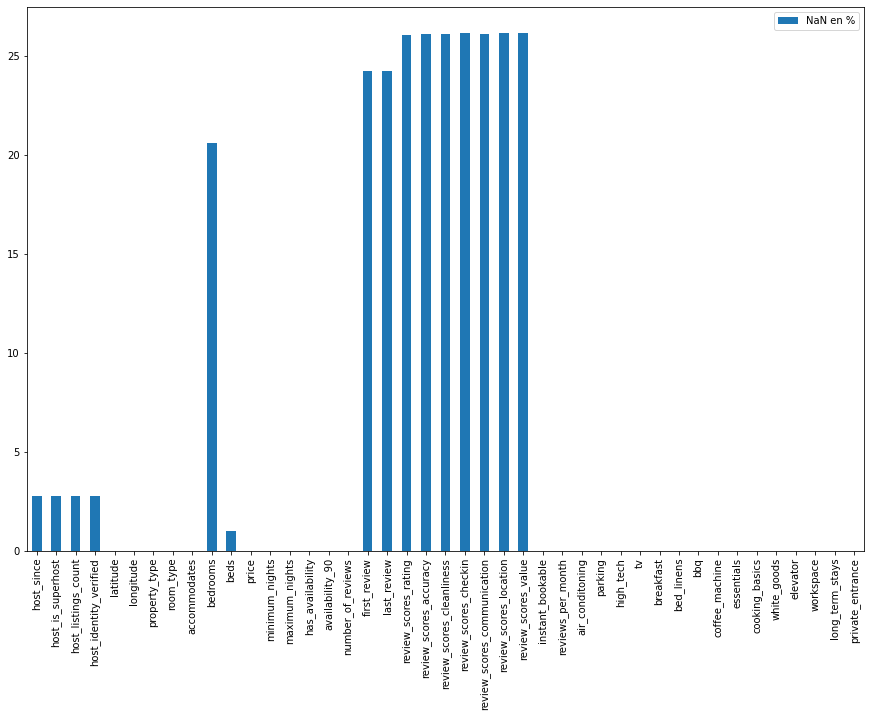

In [47]:
graphic(df)

> Colonne First_review et last_review 

In [48]:
## Nous allons voir la proportion des NA dans les colonnes first_review et last_review
print(f"Null values in 'first_review': {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df.review_scores_rating .isna().sum()/len(df),1)}%")

Null values in 'first_review': 24.3%
Null values in 'review_scores_rating': 26.1%


> Nous avons plus d'un quart des annonces qui n'ont de critiques. ils peuvent des annonces qui n'ont peu être pas reçu de visite
  Nous allons les garder car elles peuvent être très utiles dans l'explication du prix et de sa prédiction.
  Pour les valeurs NAN, nous allons constituer une nuvelle catégorie de valeur nommée "inconnu" pour celle-ci.

In [49]:
## Calculer le temps écoulé entre la première critique (review) et le jour du scraping de s données.
df.first_review = pd.to_datetime(df.first_review)
df['time_since_first_review'] = (datetime(2021, 4, 15) - df.first_review).astype('timedelta64[D]')

<AxesSubplot:>

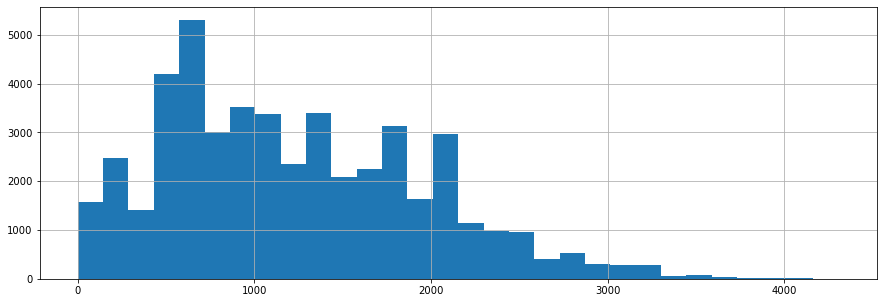

In [50]:
# Distribution de nombre de jours depuis first review
df.time_since_first_review.hist(figsize=(15,5), bins=30)

In [51]:
## Vérifions pour le cas de la colonne last_review.
df.last_review = pd.to_datetime(df.last_review)
df['time_since_last_review'] = (datetime(2021, 4, 15) - df.last_review).astype('timedelta64[D]')


<AxesSubplot:>

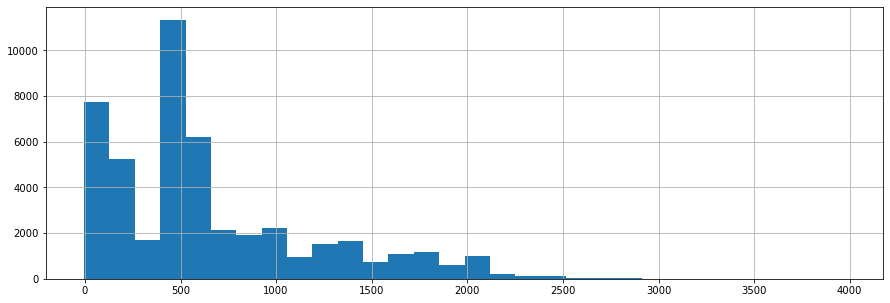

In [52]:
# Distribution de nombre de jours depuis first review
df.time_since_last_review.hist(figsize=(15,5), bins=30)

In [53]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Prend une colonne et scinde par distribution puis afefcte la valeur calculée sinon unknow pour les NaN.
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label)
    df[col].replace('nan',na_label, inplace=True)


In [54]:
# Binning time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(df.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews'
           )

In [55]:
# Binning time since last review
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(df.time_since_last_review)],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no reviews')

In [56]:
df

host_since  host_is_superhost  host_listings_count  \
id                                                             
2577      2008-09-09                0.0                  2.0   
3109      2008-10-14                0.0                  1.0   
5396      2009-02-14                0.0                  1.0   
7397      2008-08-30                1.0                  4.0   
7964      2009-06-18                0.0                  0.0   
...              ...                ...                  ...   
49127982  2013-11-03                1.0                  1.0   
49134358  2012-07-29                0.0                  0.0   
49134419  2021-03-25                0.0                  1.0   
49135525  2014-03-02                0.0                  2.0   
49135722  2019-07-15                0.0                  0.0   

          host_identity_verified  latitude  longitude property_type  \
id                                                                    
2577                         1.0  48.86957    2.36127     apartment   
3109                         0.0  48.83191    2.31870     apartment   
5396                         1.0  48.85247    2.35835     apartment   
7397                         1.0  48.85909    2.35315     apartment   
7964                         1.0  48.87417    2.34245     apartment   
...                          ...       ...        ...           ...   
49127982                     1.0  48.87593    2.34739          room   
49134358                     0.0  48.88059    2.32754     apartment   
49134419                     1.0  48.85562    2.36138     apartment   
49135525                     1.0  48.87395    2.27360          room   
49135722                     1.0  48.83254    2.32928     apartment   

                room_type  accommodates  bedrooms  beds  price  \
id                                                               
2577      Entire home/apt             4       2.0   2.0    125   
3109      Entire home/apt             2       NaN   1.0     60   
5396      Entire home/apt             2       NaN   1.0     47   
7397      Entire home/apt             4       2.0   2.0     90   
7964      Entire home/apt             2       1.0   1.0    130   
...                   ...           ...       ...   ...    ...   
49127982     Private room             2       NaN   1.0    100   
49134358  Entire home/apt             4       2.0   2.0    192   
49134419  Entire home/apt             4       1.0   1.0    200   
49135525     Private room             1       1.0   1.0     30   
49135722  Entire home/apt             2       NaN   1.0     40   

          minimum_nights  maximum_nights  has_availability  availability_90  \
id                                                                            
2577                   3            1125                 1               12   
3109                   2              30                 1               90   
5396                   1            1125                 1               58   
7397                  10             130                 1               64   
7964                   6             365                 1               90   
...                  ...             ...               ...              ...   
49127982               4              90                 1               90   
49134358               5            1125                 1                0   
49134419               1            1125                 1               43   
49135525              15              28                 1               23   
49135722               2              15                 1               15   

          number_of_reviews first_review last_review  review_scores_rating  \
id                                                                           
2577                      1   2019-01-02  2019-01-02                 100.0   
3109                      9   2016-12-27  2019-10-24                 100.0   
5396                    237   2009-06-30  2021-04-12  

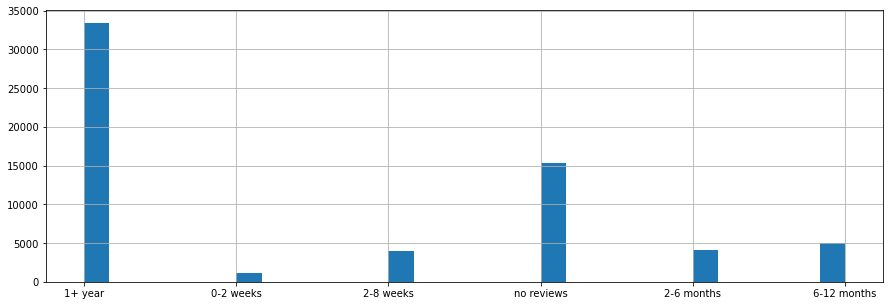

In [57]:
df.time_since_last_review.hist(figsize=(15,5), bins=30)
plt.show()

In [58]:
#Nous voyons que la plupart des dernieres reviews et non definies datent plus d'un an . 
#ce qui veut dire que nous pouvons supprimer cette colonne

df.drop('last_review', axis=1, inplace=True)

### Petit apercu sur les scores reviews ..

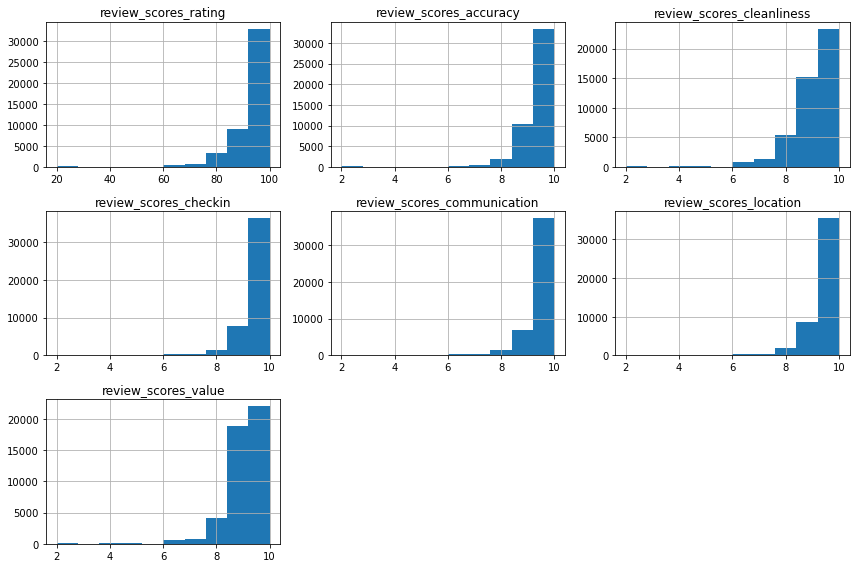

In [59]:
# La distribution des colonnes qui commence par reviews_score
variables = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [60]:
## Nous allons maintenant remplir les valeurs nan et regrouper par lot .. 
## d'abord, nous allons retirer la colonne à score par 100.

variables.pop(0)

'review_scores_rating'

In [61]:
# Binning for all columns scored out of 10
for col in variables:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8/10', '9/10', '10/10'],
               na_label='no reviews')

In [62]:
bin_column('review_scores_rating', 
           bins=[0, 80, 95, 100],
           labels=['0-79/100', '80-94/100', '95-100/100'],
           na_label='no reviews')

In [63]:
df.head()

host_since  host_is_superhost  host_listings_count  \
id                                                         
2577  2008-09-09                0.0                  2.0   
3109  2008-10-14                0.0                  1.0   
5396  2009-02-14                0.0                  1.0   
7397  2008-08-30                1.0                  4.0   
7964  2009-06-18                0.0                  0.0   

      host_identity_verified  latitude  longitude property_type  \
id                                                                
2577                     1.0  48.86957    2.36127     apartment   
3109                     0.0  48.83191    2.31870     apartment   
5396                     1.0  48.85247    2.35835     apartment   
7397                     1.0  48.85909    2.35315     apartment   
7964                     1.0  48.87417    2.34245     apartment   

            room_type  accommodates  bedrooms  beds  price  minimum_nights  \
id                                                                           
2577  Entire home/apt             4       2.0   2.0    125               3   
3109  Entire home/apt             2       NaN   1.0     60               2   
5396  Entire home/apt             2       NaN   1.0     47               1   
7397  Entire home/apt             4       2.0   2.0     90              10   
7964  Entire home/apt             2       1.0   1.0    130               6   

      maximum_nights  has_availability  availability_90  number_of_reviews  \
id                                                                           
2577            1125                 1               12                  1   
3109              30                 1               90                  9   
5396            1125                 1               58                237   
7397             130                 1               64                272   
7964             365                 1               90                  6   

     first_review review_scores_rating review_scores_accuracy  \
id                                                              
2577   2019-01-02           95-100/100                  10/10   
3109   2016-12-27           95-100/100                  10/10   
5396   2009-06-30            80-94/100                   9/10   
7397   2011-04-08            80-94/100                  10/10   
7964   2010-05-10           95-100/100                  10/10   

     review_scores_cleanliness review_scores_checkin  \
id                                                     
2577                     10/10                 10/10   
3109                     10/10                 10/10   
5396                      9/10                 10/10   
7397                      9/10                 10/10   
7964                     10/10                 10/10   

     review_scores_communication review_scores_location review_scores_value  \
id                                                                            
2577                       10/10                  10/10               10/10   
3109                       10/10                  10/10               10/10   
5396                       10/10                  10/10                9/10   
7397                       10/10                  10/10               10/10   
7964                       10/10                  10/10               10/10   

      instant_bookable  reviews_per_month  air_conditoning  parking  \
id                                                                    
2577                 0               0.04              0.0      0.0   
3109                 0               0.17              0.0      1.0   
5396                 0               1.65              0.0      0.0   
7397                 0               2.23              0.0      1.0   
7964                 0               0.05              0.0      0.0   

      high_tech   tv  breakfast  bed_linens  bbq  coffee_machine  essentials  \
id                                      

In [64]:
## Nous pouvons aussi supprimer la colonne reviews_per_month qui est redondante..
df.drop('reviews_per_month', axis=1, inplace=True)

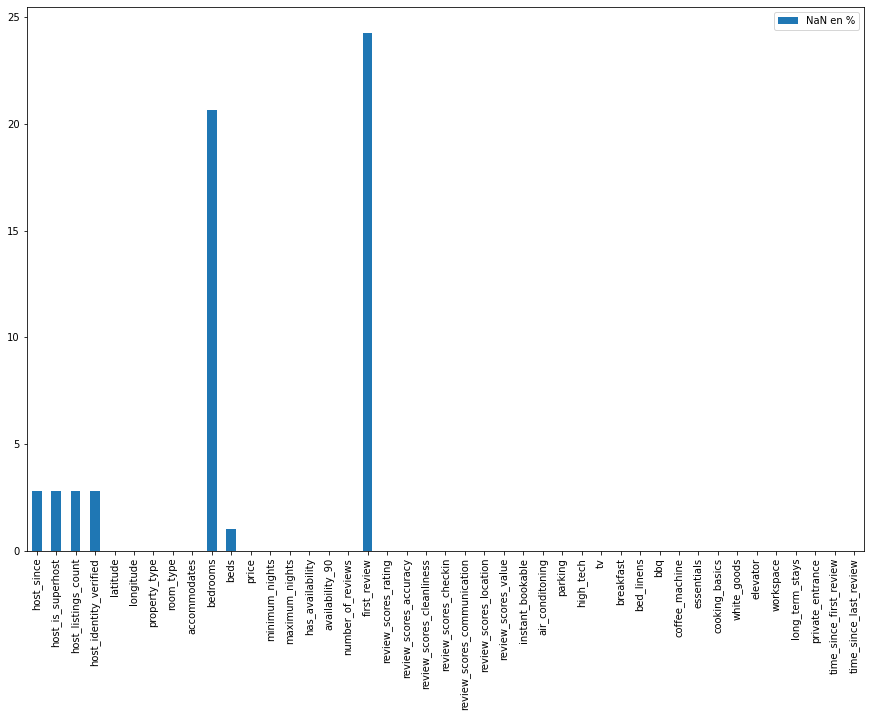

In [65]:
graphic(df)

In [66]:
for col in ['bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

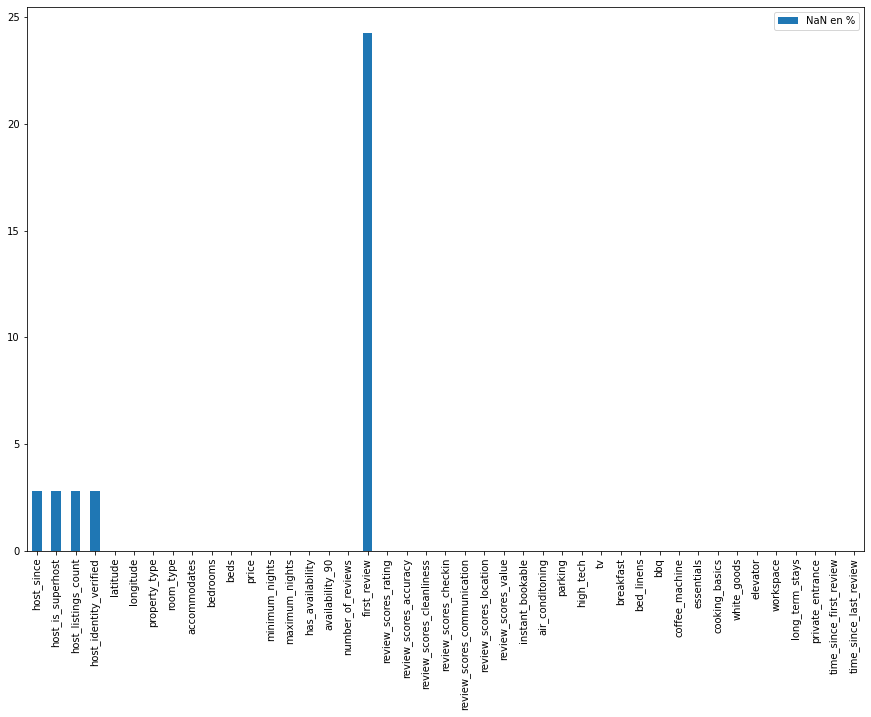

In [67]:
graphic(df)

> First_review date d'ouverture du compte sur airbnb


In [68]:
### EXPLORATION DE DONNEES

#### Combien de temps depuis qu'ils sont annoceurs sur airbnb .. 
##### Nous allons utiliser la colonne host_since

# Convertir en datetime
df.host_since = pd.to_datetime(df.host_since) 

# calcul du nombre de jours
df['host_days_active'] = (datetime(2021, 4, 15) - df.host_since).astype('timedelta64[D]')

# affichage du nombre de jour moyen et le médian
print("Mean days as host:", round(df['host_days_active'].mean(),0))
print("Median days as host:", df['host_days_active'].median())

# Replacing null values with the median
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

Mean days as host: 1987.0
Median days as host: 2108.0


In [69]:
print(f"Sur ces données en Ile de France, le premier a rejoindre airbnb {min(df.host_since).strftime('%d %B %Y')}, et le plus récent a réjoins le {max(df.host_since).strftime('%d %B %Y')}.")

Sur ces données en Ile de France, le premier a rejoindre airbnb 30 August 2008, et le plus récent a réjoins le 15 April 2021.


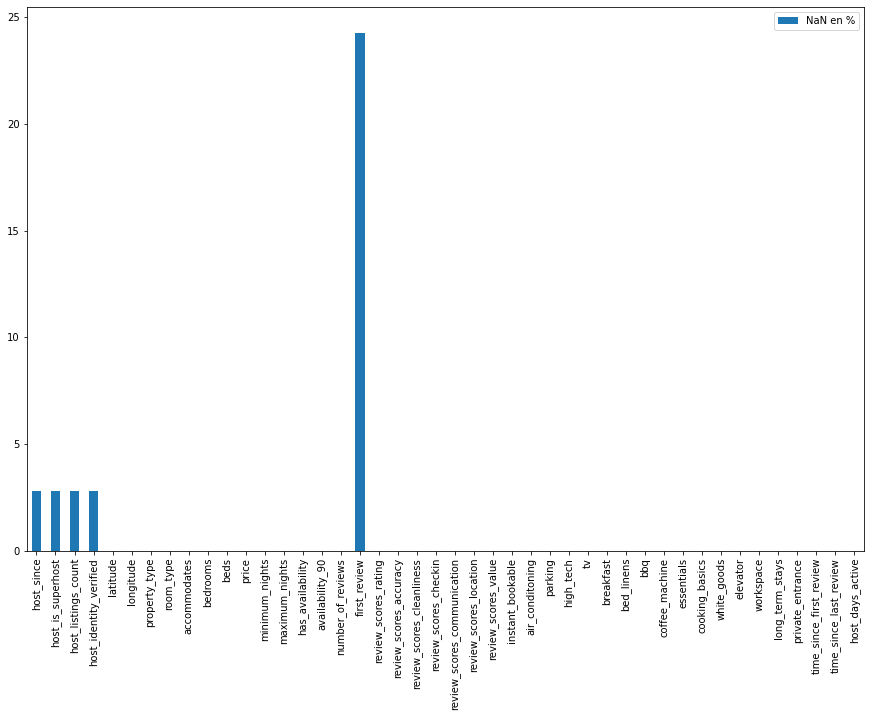

In [70]:
graphic(df)

In [71]:
## Nous avons que les colonnes host_* ont toutes le même nombre de NA. donc on supprime 
##les NA suivant les lignes en ciblant une colonne

In [72]:
df.host_since.isna().sum()==df.host_is_superhost.isna().sum()==df.host_identity_verified.isna().sum()==df.host_listings_count.isna().sum()

True

In [73]:
#### nous pouvons maintenant supprimé les lignes ou host_since est NaN .. 
####ce qui supprime aussi du coût les NaN de de toutes les colonnes qui commencnt par host_

df.dropna(subset=['host_since'], inplace=True)

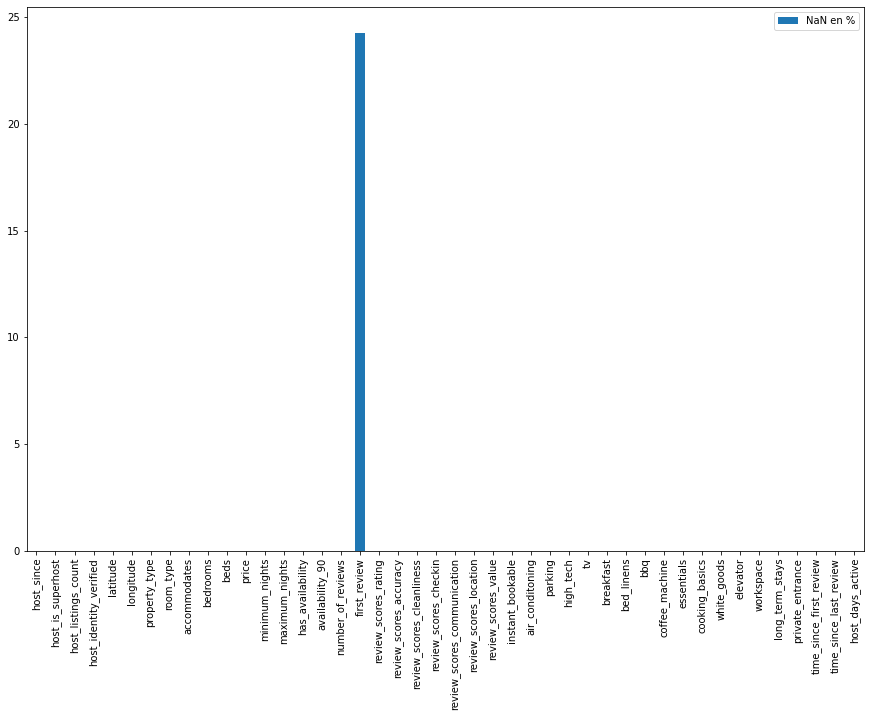

In [74]:
graphic(df)

In [75]:
### Nous avons un prix qui fluctue au court des années .. et aussi des annonces à prix très aberrantes.

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


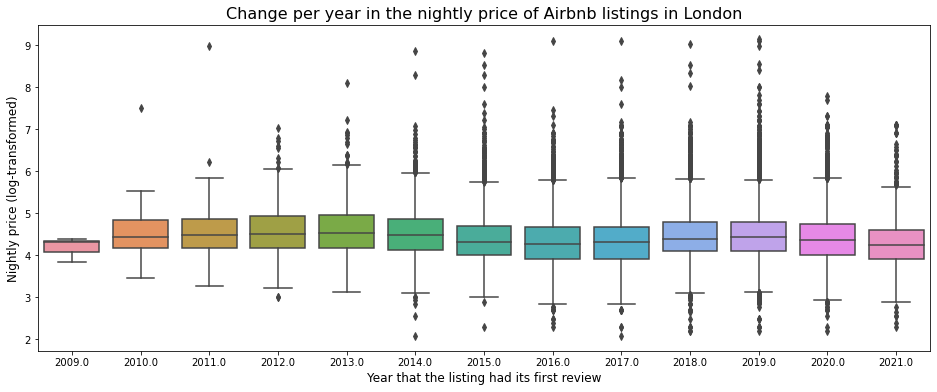

In [76]:
plt.figure(figsize=(16,6))
sns.boxplot(x=df.first_review.dt.year, y=np.log(df.price))
plt.xlabel('Year that the listing had its first review', fontsize=12)
plt.ylabel('Nightly price (log-transformed)', fontsize=12)
plt.title('Change per year in the nightly price of Airbnb listings in London', fontsize=16)
plt.show()

In [77]:
print("Moyenne de la nuité par an à Paris:")
print(round(df.set_index('first_review').price.resample('YS').mean(),2))

Moyenne de la nuité par an à Paris:
first_review
2009-01-01     67.33
2010-01-01    128.33
2011-01-01    168.44
2012-01-01    120.73
2013-01-01    126.23
2014-01-01    120.51
2015-01-01    103.15
2016-01-01     97.08
2017-01-01    100.15
2018-01-01    109.68
2019-01-01    113.91
2020-01-01    105.51
2021-01-01     97.19
Name: price, dtype: float64


In [78]:
#### EN GRAPHE LE PRIX MOYEN EN 2020 EST AU TOUR DE 100 €

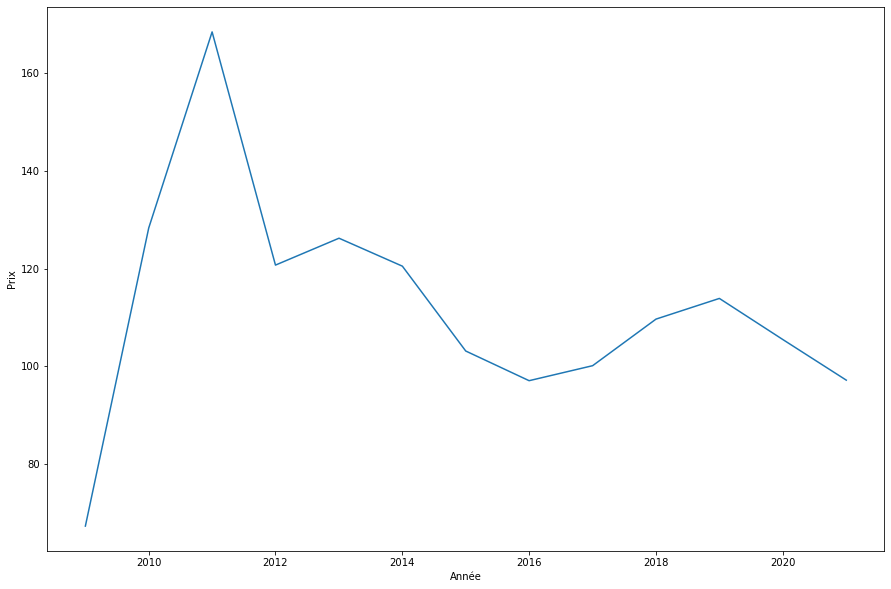

In [79]:
plt.plot(round(df.set_index('first_review').price.resample('YS').mean(),2))
plt.xlabel('Année')
plt.ylabel('Prix')
plt.show()

In [80]:
df_avant_drop_host_since_fist_review = df.copy()

In [81]:
df.drop(['host_since','first_review'], axis=1, inplace=True)

In [82]:
## Vérifions les valeurs catégorielles

def category_count_plot(col, figsize=(8,4)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    A figure size can optionally be specified.
    """
    plt.figure(figsize=figsize)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

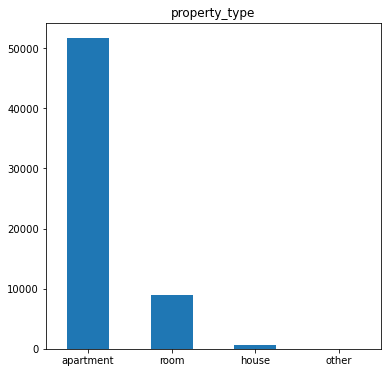

apartment    0.842654
room         0.146945
house        0.010059
other        0.000342
Name: property_type, dtype: float64


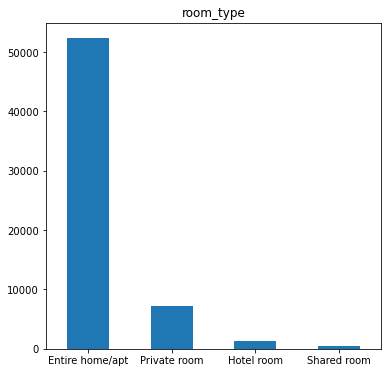

Entire home/apt    0.853512
Private room       0.118430
Hotel room         0.021602
Shared room        0.006456
Name: room_type, dtype: float64


In [83]:
for col in ['property_type', 'room_type']:
    category_count_plot(col, figsize=(6,6))
    print(df[col].value_counts(normalize=True))

In [84]:
df

host_is_superhost  host_listings_count  host_identity_verified  \
id                                                                         
2577                    0.0                  2.0                     1.0   
3109                    0.0                  1.0                     0.0   
5396                    0.0                  1.0                     1.0   
7397                    1.0                  4.0                     1.0   
7964                    0.0                  0.0                     1.0   
...                     ...                  ...                     ...   
49127982                1.0                  1.0                     1.0   
49134358                0.0                  0.0                     0.0   
49134419                0.0                  1.0                     1.0   
49135525                0.0                  2.0                     1.0   
49135722                0.0                  0.0                     1.0   

          latitude  longitude property_type        room_type  accommodates  \
id                                                                           
2577      48.86957    2.36127     apartment  Entire home/apt             4   
3109      48.83191    2.31870     apartment  Entire home/apt             2   
5396      48.85247    2.35835     apartment  Entire home/apt             2   
7397      48.85909    2.35315     apartment  Entire home/apt             4   
7964      48.87417    2.34245     apartment  Entire home/apt             2   
...            ...        ...           ...              ...           ...   
49127982  48.87593    2.34739          room     Private room             2   
49134358  48.88059    2.32754     apartment  Entire home/apt             4   
49134419  48.85562    2.36138     apartment  Entire home/apt             4   
49135525  48.87395    2.27360          room     Private room             1   
49135722  48.83254    2.32928     apartment  Entire home/apt             2   

          bedrooms  beds  price  minimum_nights  maximum_nights  \
id                                                                
2577           2.0   2.0    125               3            1125   
3109           1.0   1.0     60               2              30   
5396           1.0   1.0     47               1            1125   
7397           2.0   2.0     90              10             130   
7964           1.0   1.0    130               6             365   
...            ...   ...    ...             ...             ...   
49127982       1.0   1.0    100               4              90   
49134358       2.0   2.0    192               5            1125   
49134419       1.0   1.0    200               1            1125   
49135525       1.0   1.0     30              15              28   
49135722       1.0   1.0     40               2              15   

          has_availability  availability_90  number_of_reviews  \
id                                                               
2577                     1               12                  1   
3109                     1               90                  9   
5396                     1               58                237   
7397                     1               64                272   
7964                     1               90                  6   
...                    ...              ...                ...   
49127982                 1               90                  0   
49134358                 1                0                  0   
49134419                 1               43                  0   
49135525                 1               23                  0   
49135722                 1               15                  0   

         review_scores_rating review_scores_accuracy  \
id                                                     
2577               95-100/100                  10/10   
3109               95-100/100                  10/10   
5396                80-94/100                   9/1

In [85]:
df_transformed = pd.get_dummies(df) ### tranformation des clonnes catégorielles sous forme OneEncodeing

> Matrice de collinarité montre que le prix est très faiblement collinéaire aux autres features. Ce qui peut causer un énorme souci à l'obtention d'un résultat à partir d'un modèle Machine Learning.. 
Une réduction de composant peut être utlisé pour tenter d'obtenir un meilleur résultat en réduisant les features.

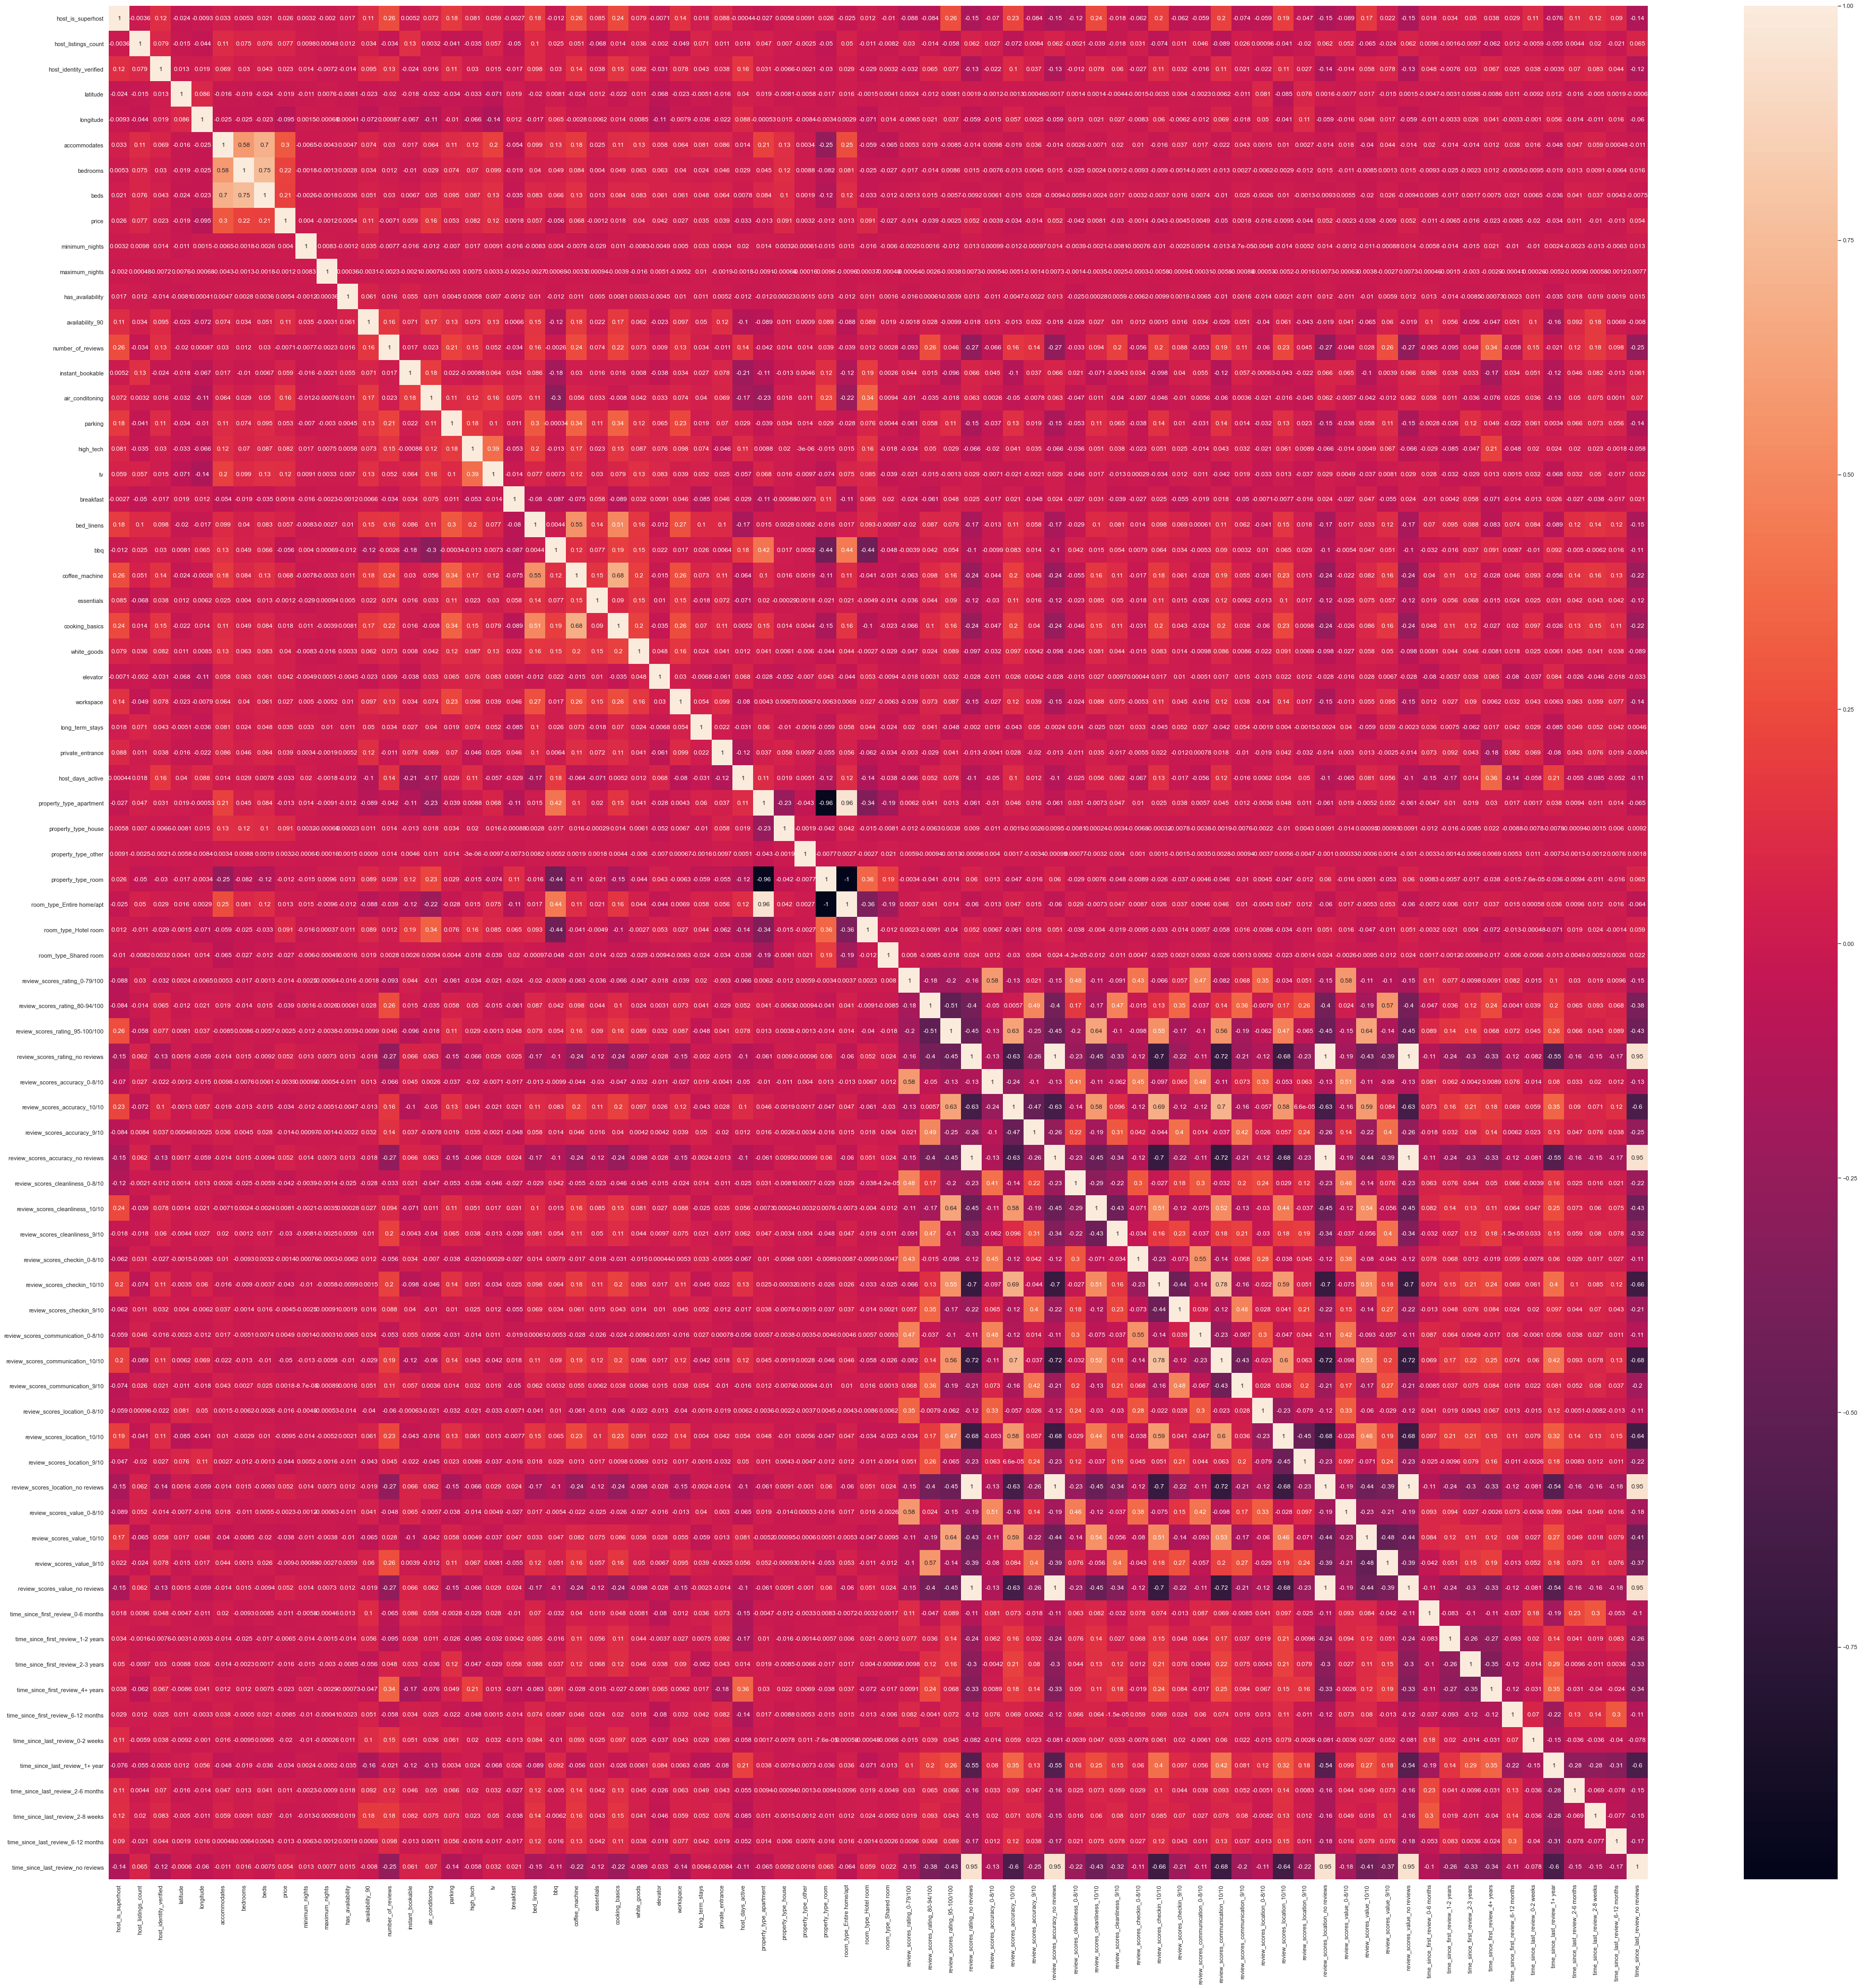

In [134]:
plt.rcParams["figure.figsize"] = (65,65)
sns.heatmap(df_transformed.corr(), annot=True)
plt.show()

In [87]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

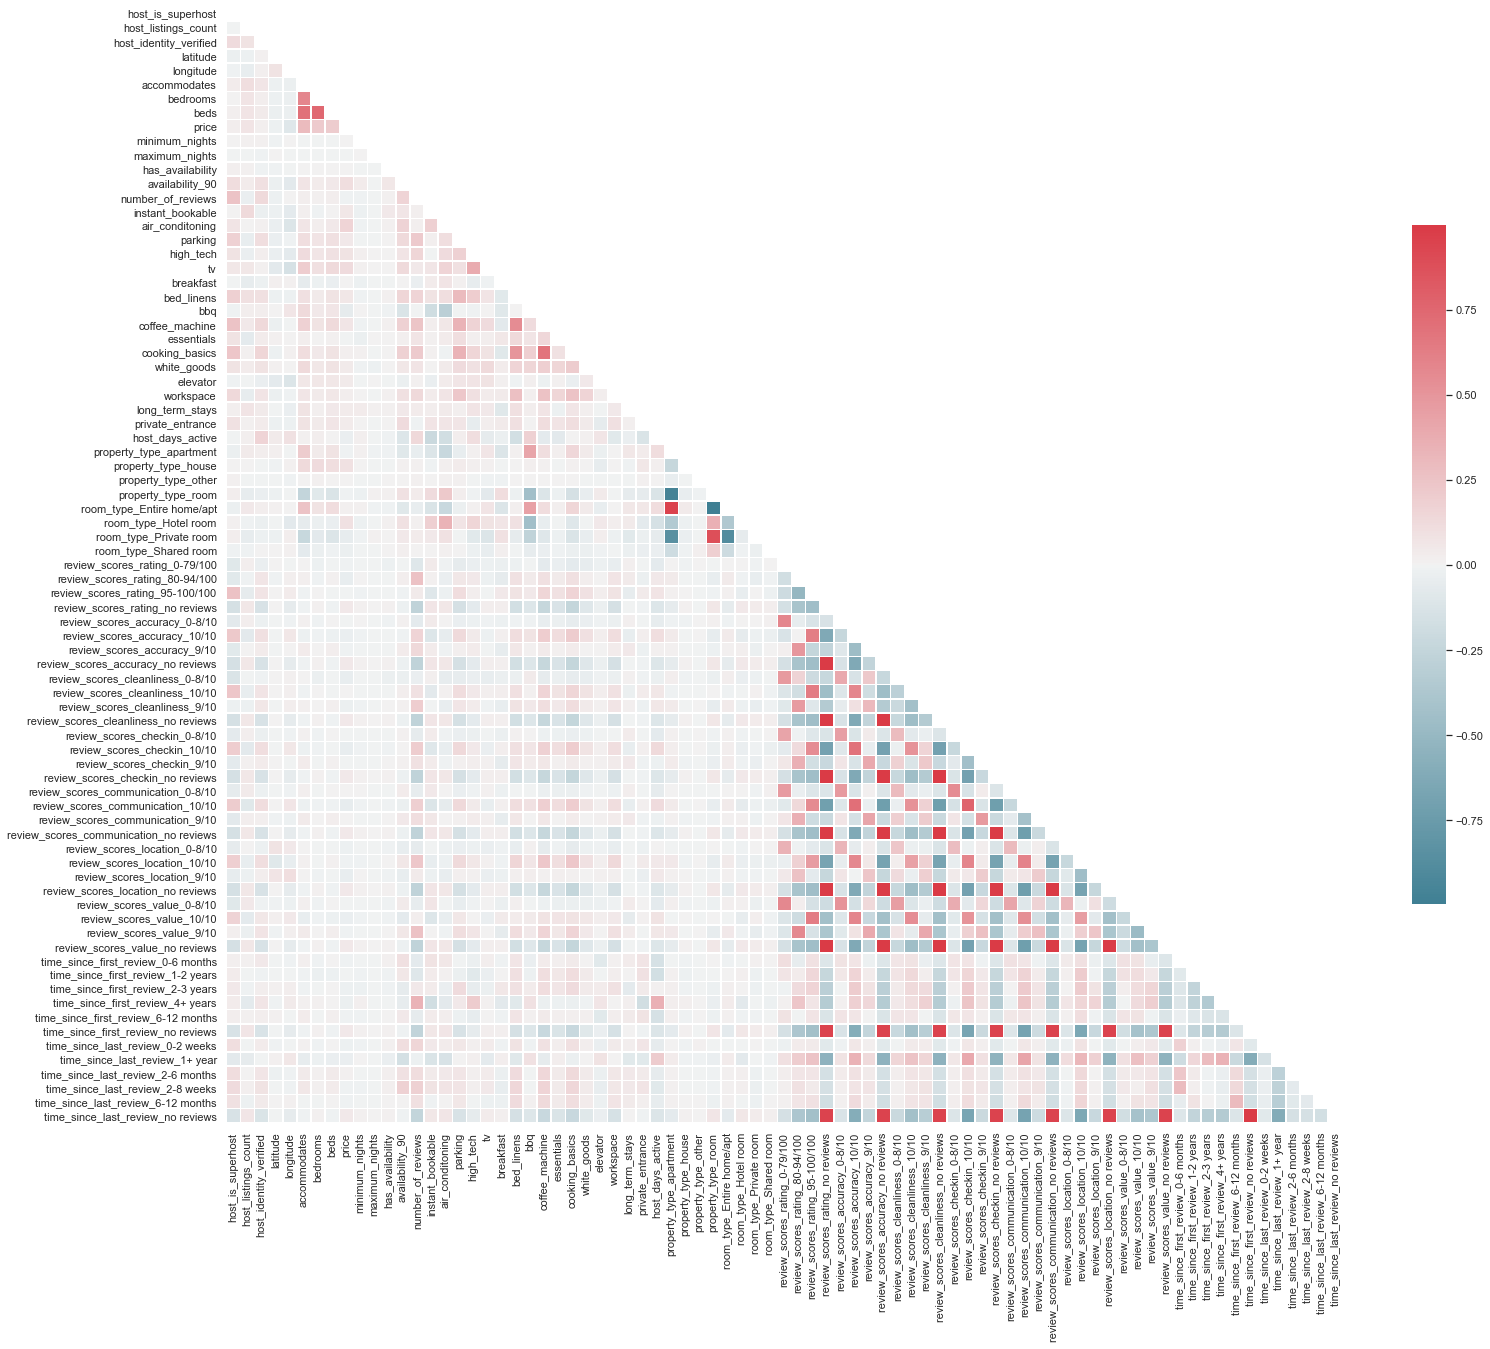

In [88]:
multi_collinearity_heatmap(df_transformed, figsize=(25,25))

In [89]:
## Suppression des colonnes dû à leurs fortes coliénarité.. review_scores_accurancy_no reviews
## colonne colinéaire: 

col_to_drop_ = [
   
    'time_since_first_review_no reviews','review_scores_cleanliness_no reviews',
    'review_scores_communication_no reviews','review_scores_checkin_no reviews'
]



In [90]:
df_transformed_copy = df_transformed.copy()

In [91]:
df_transformed.drop(col_to_drop_, axis=1, inplace=True)

In [92]:
df_transformed.drop(['room_type_Private room'],axis=1, inplace=True)

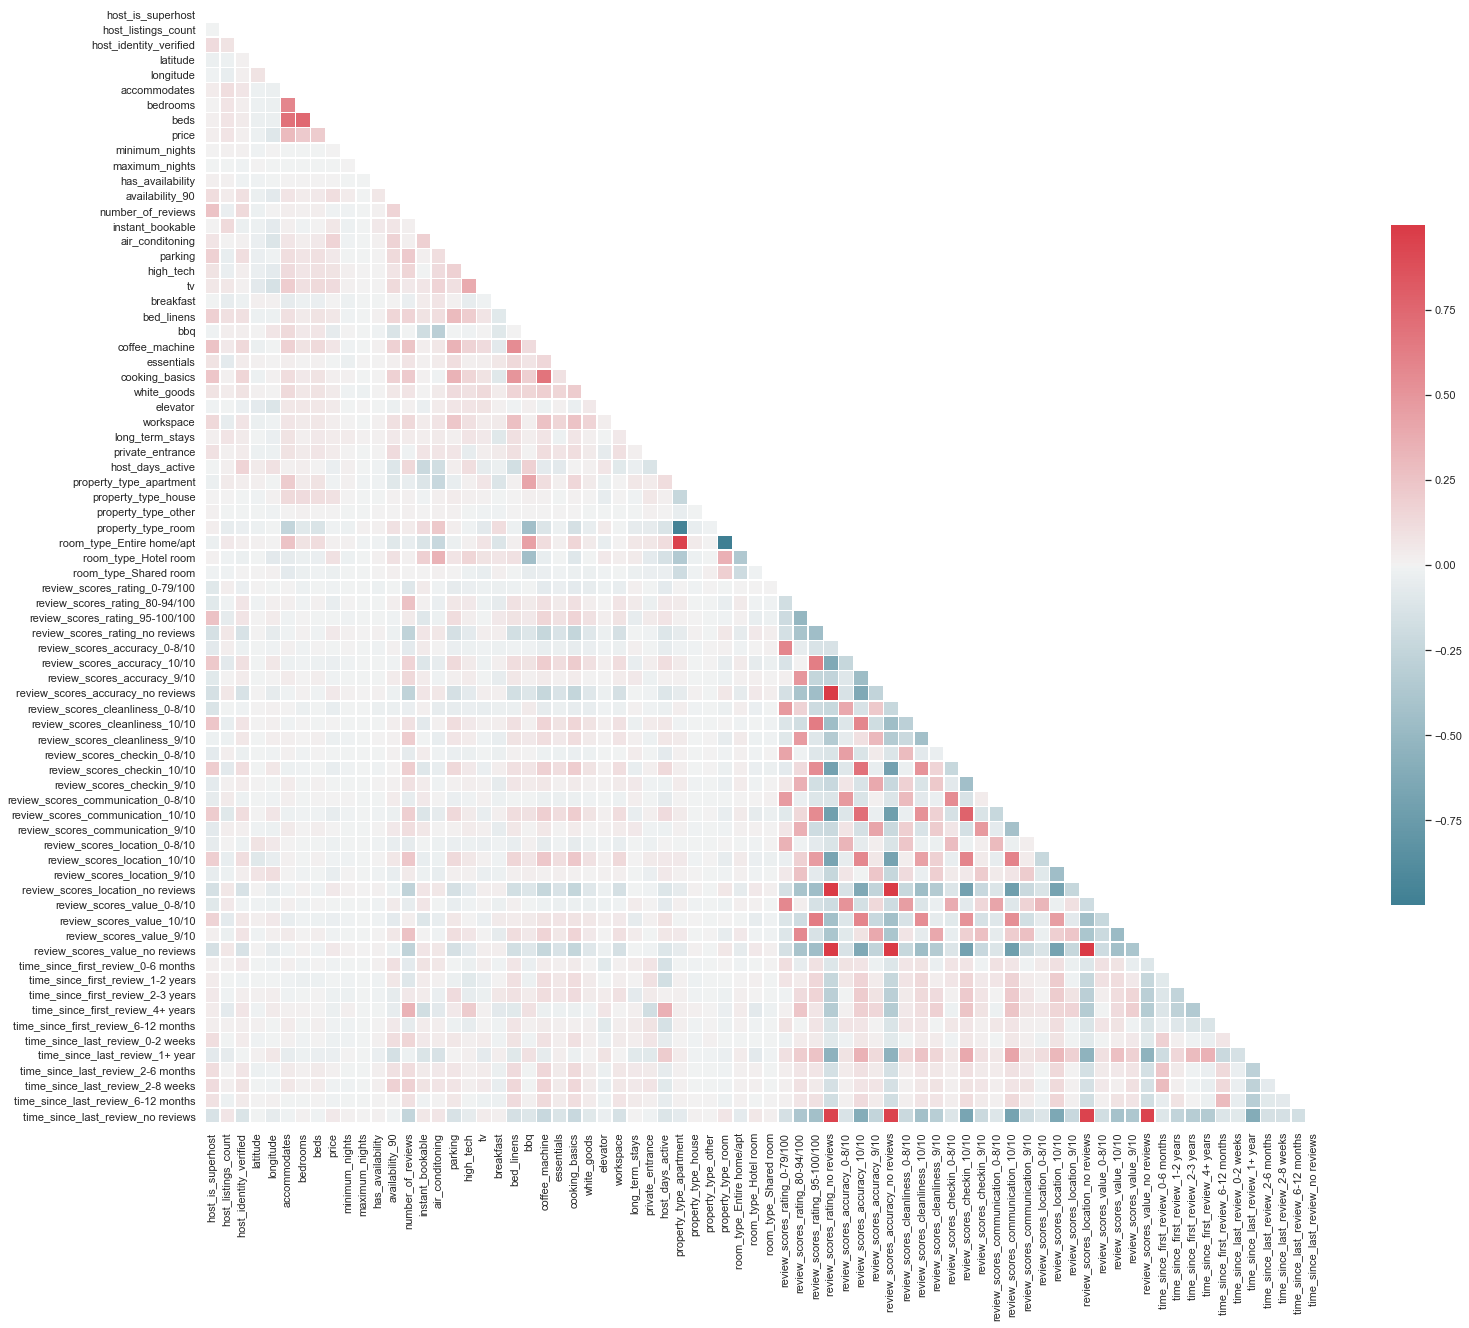

In [93]:
multi_collinearity_heatmap(df_transformed, figsize=(25,25))

## suppressions de colonnes à fortes colinéarités

In [94]:
## fonction qui calcule les forte collinéarité entre colonnes

def get_VIF(dataFrame , target):
    X = add_constant(dataFrame.loc[:, dataFrame.columns != target])
    seriesObject = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index=X.columns,)
    df = pd.DataFrame(seriesObject)
    
    return df

In [95]:
DF_COLLINEARITE = get_VIF(df_transformed, 'price')

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [96]:
DF_COLLINEARITE

0
const                                   0.000000
host_is_superhost                       1.253866
host_listings_count                     1.094368
host_identity_verified                  1.104813
latitude                                1.037148
longitude                               1.078005
accommodates                            2.226605
bedrooms                                2.343819
beds                                    2.976043
minimum_nights                          1.007512
maximum_nights                          1.000939
has_availability                        1.009059
availability_90                         1.187335
number_of_reviews                       1.603390
instant_bookable                        1.163245
air_conditoning                         1.285603
parking                                 1.283630
high_tech                               1.372240
tv                                      1.301026
breakfast                               1.062872
bed_linens                              1.715219
bbq                                     1.558541
coffee_machine                          2.252336
essentials                              1.092725
cooking_basics                          2.198420
white_goods                             1.135005
elevator                                1.075945
workspace                               1.182623
long_term_stays                         1.052487
private_entrance                        1.106776
host_days_active                        1.392482
property_type_apartment                      inf
property_type_house                          inf
property_type_other                          inf
property_type_room                           inf
room_type_Entire home/apt             243.654100
room_type_Hotel room                    1.468278
room_type_Shared room                   1.055732
review_scores_rating_0-79/100                inf
review_scores_rating_80-94/100               inf
review_scores_rating_95-100/100              inf
review_scores_rating_no reviews              inf
review_scores_accuracy_0-8/10                inf
review_scores_accuracy_10/10                 inf
review_scores_accuracy_9/10                  inf
review_scores_accuracy_no reviews            inf
review_scores_cleanliness_0-8/10      622.737671
review_scores_cleanliness_10/10      1290.691415
review_scores_cleanliness_9/10       1015.755514
review_scores_checkin_0-8/10          185.407050
review_scores_checkin_10/10          1265.454053
review_scores_checkin_9/10            559.211348
review_scores_communication_0-8/10    160.910981
review_scores_communication_10/10    1160.446281
review_scores_communication_9/10      476.146839
review_scores_location_0-8/10                inf
review_scores_location_10/10                 inf
review_scores_location_9/10                  inf
review_scores_location_no reviews            inf
review_scores_value_0-8/10                   inf
review_scores_value_10/10                    inf
review_scores_value_9/10                     inf
review_scores_value_no reviews               inf
time_since_first_review_0-6 months     82.081802
time_since_first_review_1-2 years     379.495973
time_since_first_review_2-3 years     497.722837
time_since_first_review_4+ years      520.499160
time_since_first_review_6-12 months   101.833890
time_since_last_review_0-2 weeks             inf
time_since_last_review_1+ year               inf
time_since_last_review_2-6 months            inf
time_since_last_review_2-8 weeks             inf
time_since_last_review_6-12 months           inf
time_since_last_review_no reviews            inf

In [97]:
## Notre dataframe est df_tranformed..  s'il y chagement on ajoute la version 

In [98]:
best_value_index  = list(DF_COLLINEARITE.index)

best_value_index.remove('const')
best_value_index.remove('property_type_apartment')
best_value_index.remove('property_type_room')

best_value_index.remove('review_scores_rating_0-79/100')
best_value_index.remove('review_scores_accuracy_0-8/10')
best_value_index.remove('review_scores_location_0-8/10')

best_value_index.remove('review_scores_value_0-8/10')
best_value_index.remove('time_since_last_review_0-2 weeks')
best_value_index.remove('review_scores_accuracy_no reviews')
best_value_index.remove('review_scores_communication_10/10')
best_value_index.remove('review_scores_location_no reviews')


best_value_index.remove('review_scores_checkin_10/10')
best_value_index.remove('time_since_first_review_4+ years')
best_value_index.remove('review_scores_cleanliness_10/10')
best_value_index.remove('review_scores_rating_no reviews')
best_value_index.remove('time_since_last_review_no reviews')
best_value_index.remove('review_scores_accuracy_10/10')
best_value_index.remove('time_since_first_review_0-6 months')
best_value_index.remove('review_scores_value_no reviews')
best_value_index.remove('review_scores_rating_95-100/100')
best_value_index.remove('time_since_last_review_1+ year')
best_value_index.remove('review_scores_location_10/10')


df_test = df_transformed[best_value_index]
list(df_test.index)
#price=df_transformed[['price']].loc[list(df_test.index),:]
#df_test['price'] = price[['price']]

#best_lat_long = lat_long.loc[list(best_index), :]
#df_test['long'] = best_lat_long['longitude']
#df_test['lat'] = best_lat_long['latitude']
df_test.dropna(inplace=True)

get_VIF(df_test,'price')

<ipython-input-98-f3c052927a7e>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.dropna(inplace=True)


0
const                                7.253772e+06
host_is_superhost                    1.238661e+00
host_listings_count                  1.093402e+00
host_identity_verified               1.102115e+00
latitude                             1.026342e+00
longitude                            1.073765e+00
accommodates                         2.226009e+00
bedrooms                             2.342458e+00
beds                                 2.975090e+00
minimum_nights                       1.007048e+00
maximum_nights                       1.000915e+00
has_availability                     1.008759e+00
availability_90                      1.178840e+00
number_of_reviews                    1.405250e+00
instant_bookable                     1.154376e+00
air_conditoning                      1.281468e+00
parking                              1.281491e+00
high_tech                            1.358830e+00
tv                                   1.299758e+00
breakfast                            1.062027e+00
bed_linens                           1.711309e+00
bbq                                  1.556159e+00
coffee_machine                       2.249146e+00
essentials                           1.091789e+00
cooking_basics                       2.191451e+00
white_goods                          1.133925e+00
elevator                             1.070781e+00
workspace                            1.180602e+00
long_term_stays                      1.051563e+00
private_entrance                     1.097501e+00
host_days_active                     1.332822e+00
property_type_house                  1.031075e+00
property_type_other                  1.002166e+00
room_type_Entire home/apt            1.494209e+00
room_type_Hotel room                 1.465925e+00
room_type_Shared room                1.055046e+00
review_scores_rating_80-94/100       2.033504e+00
review_scores_accuracy_9/10          1.579255e+00
review_scores_cleanliness_0-8/10     1.488252e+00
review_scores_cleanliness_9/10       1.623471e+00
review_scores_checkin_0-8/10         1.588675e+00
review_scores_checkin_9/10           1.512977e+00
review_scores_communication_0-8/10   1.610826e+00
review_scores_communication_9/10     1.549003e+00
review_scores_location_9/10          1.162265e+00
review_scores_value_10/10            1.876743e+00
review_scores_value_9/10             2.453125e+00
time_since_first_review_1-2 years    1.431731e+00
time_since_first_review_2-3 years    1.395839e+00
time_since_first_review_6-12 months  1.351487e+00
time_since_last_review_2-6 months    1.149667e+00
time_since_last_review_2-8 weeks     1.206132e+00
time_since_last_review_6-12 months   1.248934e+00

In [99]:
price=df_transformed[['price']].loc[list(df_test.index),:]
df_test.loc[:,'price'] = price[['price']]


/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [100]:
### Suppression des outiliers
def remover_outliers(df,col):
    
    ##https://www.airbnb.fr/help/article/2108/limitation-du-nombre-de-nuit%C3%A9es-en-france%C2%A0-foire-aux-questions
    quantile = df[col].quantile([0,0.75])
    index= df[col][~df[col].clip(*quantile).isin(quantile)].index
    #print(index)
        #union_index = list(set(union_index)) + index
    return list(index)

In [101]:
best_index =remover_outliers(df_test,'price')
#print(list(best_index))
df_test= df_test.loc[list(best_index), :]

In [102]:
df_test.to_csv('donnees_airbnb_nettoyees.csv', index=False)

#### IMPLEMENTATION DES MODELES

In [103]:

### MODEL LINEAIRE.. LINEAR REGRESSION
### MODEL DECISION FOREST
### 

### train split 

In [104]:
y = df_test[['price']]
X = df_test.drop('price',axis=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, )

In [105]:
X

host_is_superhost  host_listings_count  host_identity_verified  \
id                                                                         
3109                    0.0                  1.0                     0.0   
5396                    0.0                  1.0                     1.0   
7397                    1.0                  4.0                     1.0   
9359                    0.0                  3.0                     1.0   
9952                    1.0                  1.0                     1.0   
...                     ...                  ...                     ...   
49123234                0.0                  4.0                     1.0   
49123235                0.0                  4.0                     1.0   
49127982                1.0                  1.0                     1.0   
49135525                0.0                  2.0                     1.0   
49135722                0.0                  0.0                     1.0   

          latitude  longitude  accommodates  bedrooms  beds  minimum_nights  \
id                                                                            
3109      48.83191    2.31870             2       1.0   1.0               2   
5396      48.85247    2.35835             2       1.0   1.0               1   
7397      48.85909    2.35315             4       2.0   2.0              10   
9359      48.86006    2.34863             2       1.0   1.0             180   
9952      48.86373    2.37093             2       1.0   1.0               2   
...            ...        ...           ...       ...   ...             ...   
49123234  48.86821    2.34956             4       2.0   2.0               3   
49123235  48.86875    2.34925             4       2.0   2.0               3   
49127982  48.87593    2.34739             2       1.0   1.0               4   
49135525  48.87395    2.27360             1       1.0   1.0              15   
49135722  48.83254    2.32928             2       1.0   1.0               2   

          maximum_nights  has_availability  availability_90  \
id                                                            
3109                  30                 1               90   
5396                1125                 1               58   
7397                 130                 1               64   
9359                 365                 1               83   
9952                  31                 1               59   
...                  ...               ...              ...   
49123234             365                 1                0   
49123235             365                 1                0   
49127982              90                 1               90   
49135525              28                 1               23   
49135722              15                 1               15   

          number_of_reviews  instant_bookable  air_conditoning  parking  \
id                                                                        
3109                      9                 0              0.0      1.0   
5396                    237                 0              0.0      0.0   
7397                    272                 0              0.0      1.0   
9359                      0                 0              0.0      0.0   
9952                     26                 1              0.0      1.0   
...                     ...               ...              ...      ...   
49123234                  0                 1              1.0      0.0   
49123235                  0                 1              1.0      0.0   
49127982                  0                 0              0.0      0.0   
49135525                  0                 1              0.0      0.0   
49135722                  0                 1              0.0      0.0   

          high_tech   tv  breakfast  bed_linens  bbq  coffee_machine  \
id                                                                     
3109            0.0  0.0        0.0         0.0  1.0 

##### Données centrées réduites

In [106]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

****Données test et de train****

In [107]:
X_train,X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.2, random_state=43)

***MODELE DE REGRESSION LINEAIRE***

In [108]:
lr = LinearRegression()
## fit model 
lr.fit(X_train, y_train)

LinearRegression()

In [109]:
preds = lr.predict(X_test)

In [110]:
preds

array([[72.99507518],
       [49.83011918],
       [54.14770889],
       ...,
       [58.18803457],
       [66.55326425],
       [76.13240532]])

In [111]:
lr.score(X_test, y_test)

-29.439458603165555

In [112]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time

***XGBRegressor***

Time taken to run: 0.2 minutes

Training MSE: 215.1123
Validation MSE: 306.5814

Training r2: 0.5913
Validation r2: 0.4267


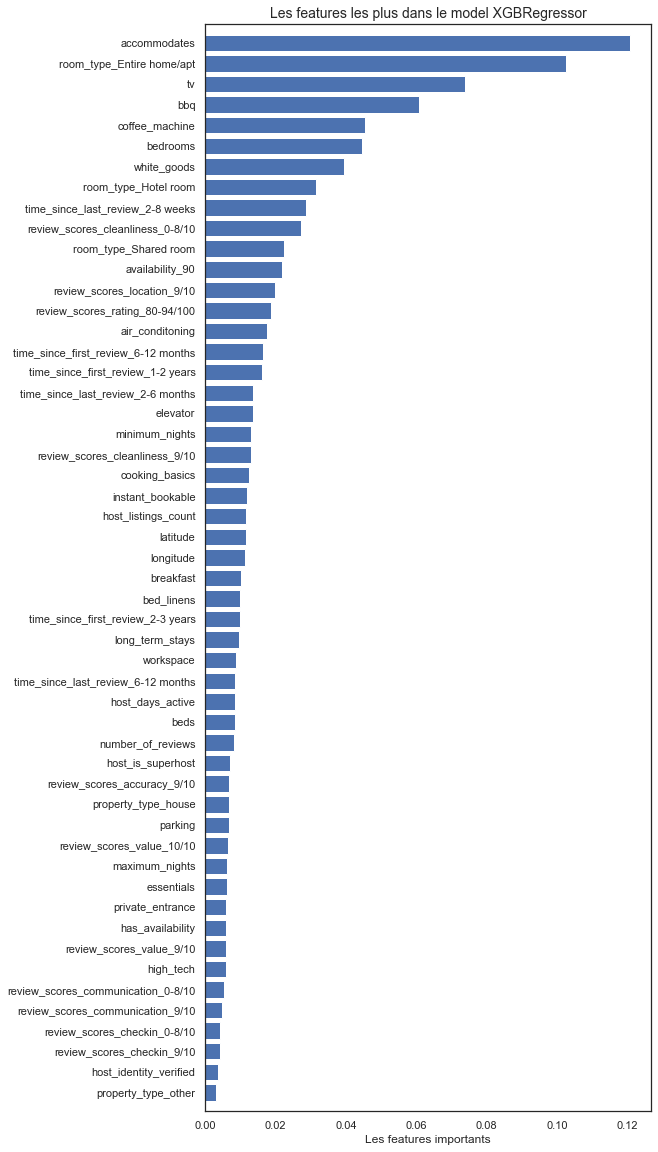

In [113]:
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

### les features les plus importantes

# Producing a dataframe of feature importances
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'],index=X.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)

# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Les features les plus dans le model XGBRegressor", fontsize=14)
plt.xlabel("Les features importants")
plt.margins(y=0.01)
plt.show()

In [114]:
#Nous pouvons noter avec ce modèle les features importants sont :
best_features=['accommodates','room_type_Entire home/apt','bbq','tv','coffee_machine',
 'bedrooms','white_goods','room_type_Hotel room','time_since_last_review_2-8 weeks',
 'room_type_Shared room','review_scores_cleanliness_0-8/10','availability_90',
 'review_scores_location_9/10','review_scores_rating_80-94/100',
 'time_since_first_review_1-2 years','air_conditoning',
 'time_since_last_review_6-12 months','time_since_last_review_2-6 months',
 'elevator','minimum_nights','review_scores_cleanliness_9/10','cooking_basics',
 'instant_bookable','host_listings_count'
]


***RidgeCV***

In [115]:
from sklearn.linear_model import RidgeCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.utils.fixes import parse_version
from sklearn.preprocessing import QuantileTransformer, quantile_transform

regr_trans = TransformedTargetRegressor(
    regressor=RidgeCV(),
    transformer=QuantileTransformer(n_quantiles=800,
                                    output_distribution='normal'))

regr_trans.fit(X_train, y_train)
y_pred = regr_trans.predict(X_test)
regr_trans.score(X_test, y_test)

0.29611324735153577

***LASSO***

In [116]:
from sklearn.linear_model import Lasso
reg_lasso = Lasso(alpha=0.2)
reg_lasso.fit(X_train, y_train)
preds = reg_lasso.predict(X_test)
reg_lasso.score(X_test, y_test)

0.2989161361524729

***ELASTIC NET***

In [117]:
from sklearn.linear_model import ElasticNet
alpha=0.1
enet = ElasticNet(alpha=alpha, l1_ratio=0.9)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.1, l1_ratio=0.9)
r^2 on test data : 0.300868


***RandomForest Regressor***

In [118]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=50, random_state=0)
regr.fit(X_train, y_train)
preds = regr.predict(X_test)
regr.score(X_test, y_test)

<ipython-input-118-ff2017f42a07>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


0.40591726212763757

**GRIDSEARCH**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
y_train = y_train.ravel()
clf_gs = GridSearchCV(svc, parameters)
clf_gs.fit(X_train, y_train)
y_test= y_test.ravel()
clf_gs.score(X_test, y_test)

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


> ### Nous voyons que les modèles de regression utilisés donnent des résulats qui ne sont pas assez bon. le maximun est obtenu avec le XGBRegressor  avec à peine 60 %*

#### Nous allons effecturer une réduction de dimension avec l'algorithme ACP

#### Analyse en Composante Principal permet de réduire le nombre en essayant de garder le maximum d'informations

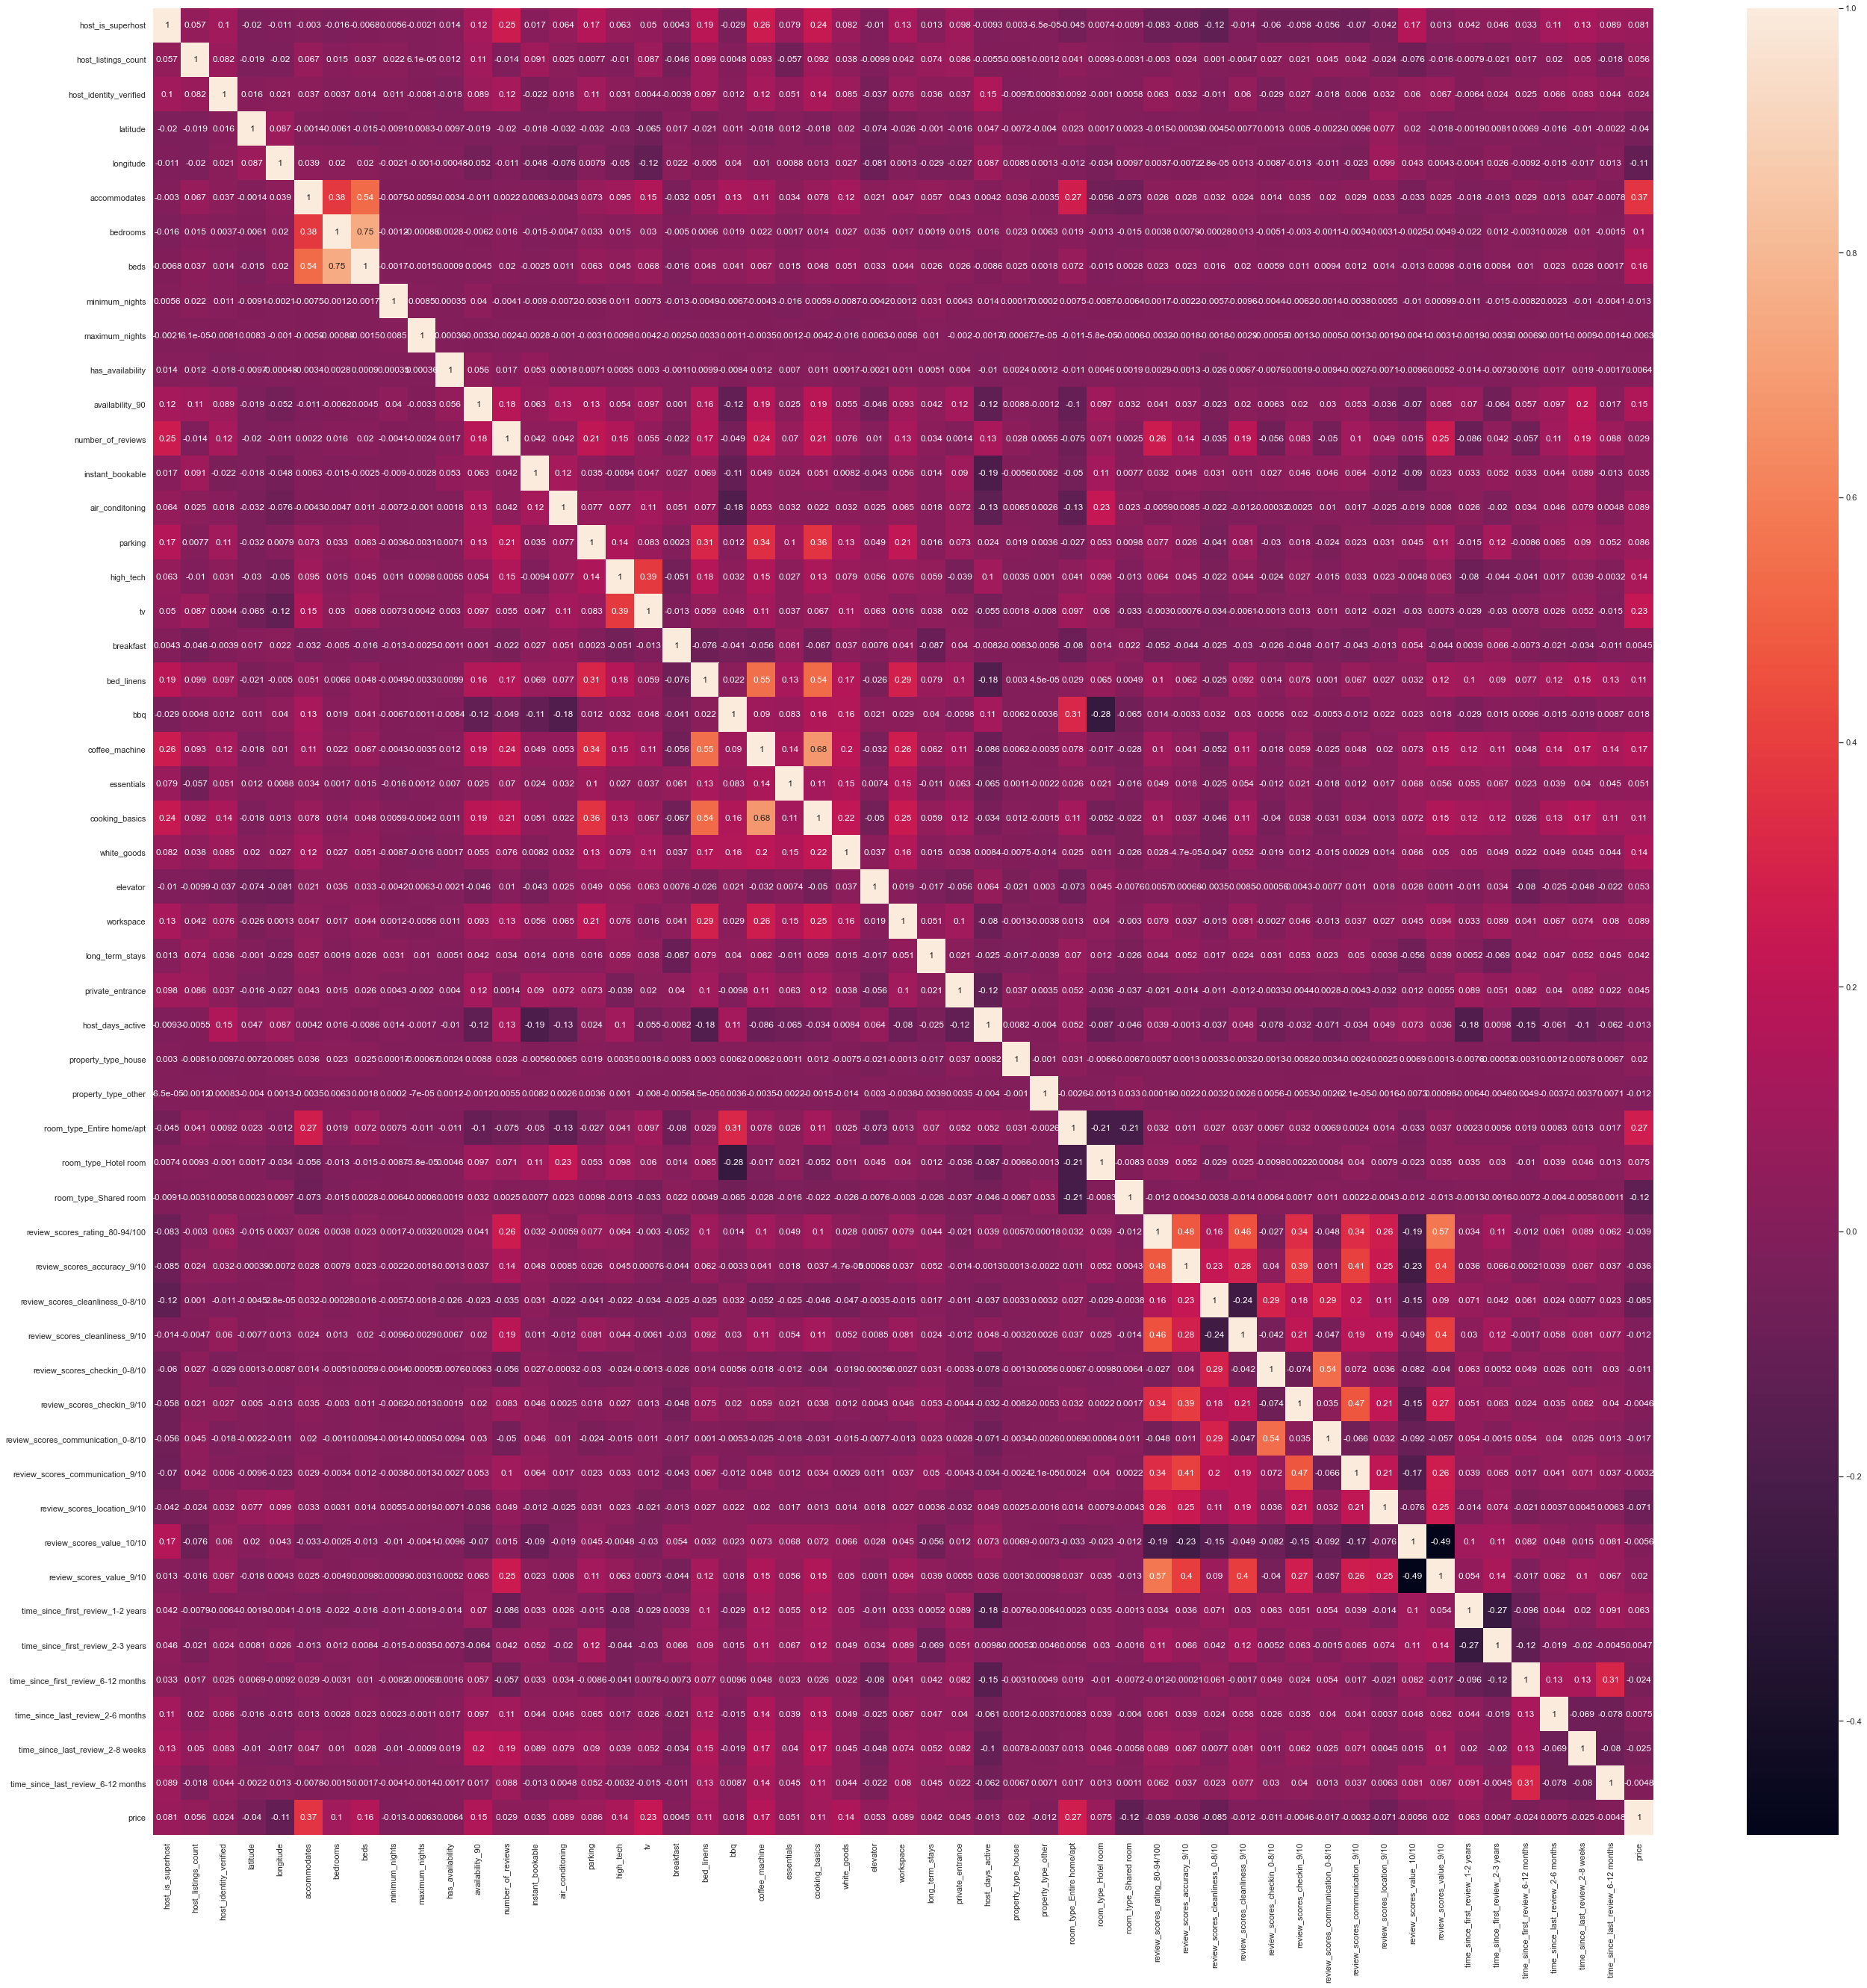

In [132]:

plt.rcParams["figure.figsize"] = (45,45)
sns.heatmap(df_test.corr(), annot=True)
plt.show()


In [121]:

from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(0.95)
X_reducted = pca.fit_transform(X)

In [122]:
pca.explained_variance_ratio_

array([0.07605453, 0.05700231, 0.04402934, 0.03993867, 0.03576762,
       0.02997647, 0.02870715, 0.02582317, 0.02511111, 0.02388516,
       0.02243621, 0.0220006 , 0.02143924, 0.02087453, 0.02069645,
       0.0202135 , 0.01986384, 0.01946798, 0.01926858, 0.01920654,
       0.01891346, 0.01883289, 0.01850461, 0.01758947, 0.0174143 ,
       0.01731873, 0.01706766, 0.01663815, 0.01612799, 0.0156707 ,
       0.01550269, 0.01519421, 0.01488297, 0.01456217, 0.01412249,
       0.01377688, 0.01338133, 0.01269072, 0.01224825, 0.01190118,
       0.01139405, 0.01097547, 0.01025978, 0.00984275, 0.00900144])

In [123]:
X_reducted.shape

(45399, 45)

In [124]:
X_train_reducted, X_test_reducted, y_train_reducted, y_test_reducted = train_test_split(X_reducted, y, test_size=0.2, random_state=42)

In [125]:
np.argmax(np.cumsum(pca.explained_variance_ratio_)> 0.95)

44

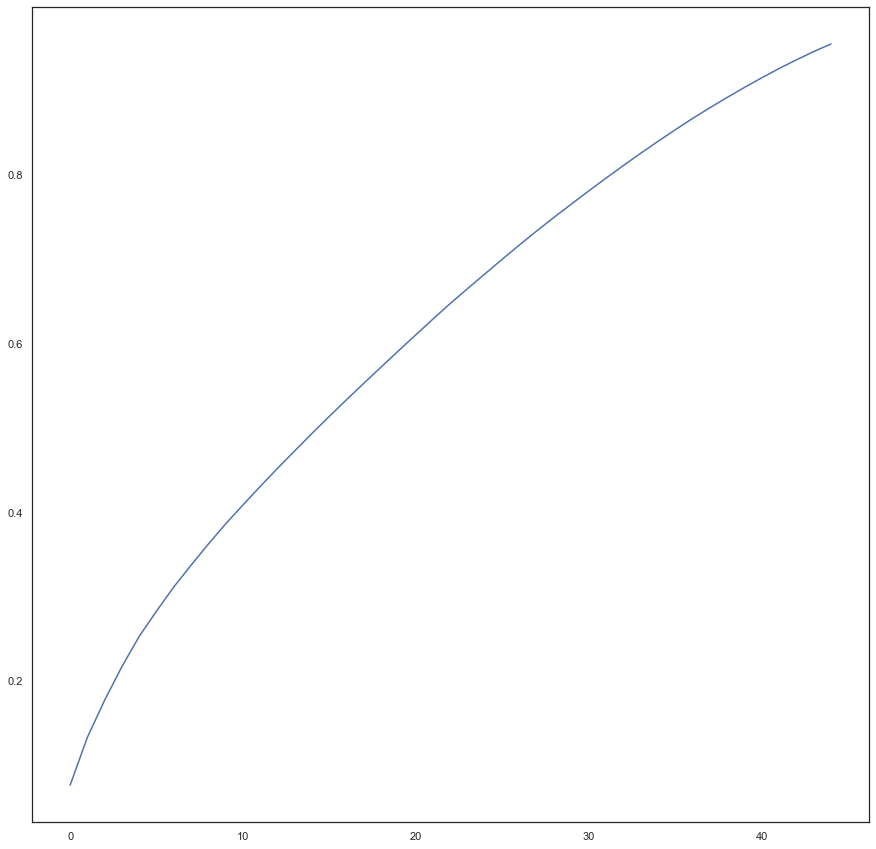

In [126]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

***LinearRegression***

In [127]:
LinearModel = LinearRegression()
## fit model 
LinearModel.fit(X_train_reducted, y_train_reducted)
LinearModel.score(X_test_reducted, y_test_reducted)

0.2841538993248902

***Nous obtenons un score encore très faible..***

***XGBRegressor***

***NOus avons toujours un mauvais score avec la réduction de dimension.¨***

In [128]:
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train_reducted, y_train_reducted)
training_preds_xgb_reg = xgb_reg.predict(X_train_reducted)
val_preds_xgb_reg = xgb_reg.predict(X_test_reducted)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train_reducted, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test_reducted, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train_reducted, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test_reducted, val_preds_xgb_reg),4))


Time taken to run: 0.6 minutes

Training MSE: 190.463
Validation MSE: 360.6594

Training r2: 0.6396
Validation r2: 0.3147


In [129]:
X_train_reducted

array([[-2.13881142, -0.02888166,  1.57485002, ..., -0.64856948,
        -0.32002066, -0.20043339],
       [ 3.68388179,  1.71989874,  1.75599114, ..., -0.56860405,
         0.24443385, -0.09745054],
       [ 0.67955117, -3.51777784, -0.05000508, ...,  0.02942502,
         0.73368688, -0.3248344 ],
       ...,
       [-0.04383359,  2.21436315,  1.02574001, ..., -0.01147031,
         0.14480828, -0.31241404],
       [ 1.94953053, -3.64204849,  1.48529589, ...,  0.26037538,
         0.11621076,  0.47242379],
       [-0.08066243,  2.36451052, -1.32406378, ..., -0.08375249,
         0.219051  ,  0.99816987]])

***RandomForest Regressor***

Le résultat est autour de 32% 

In [135]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=50, random_state=0)
regr.fit(X_train_reducted, y_train_reducted)
preds = regr.predict(X_test_reducted)
regr.score(X_test_reducted, y_test_reducted)

<ipython-input-135-103c8266f5e7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train_reducted, y_train_reducted)


0.32459405266958896

### Conclusion 

Nous arrivons à termes de ce projet pendant lequel nous avons arriver à mettre en place des modèles de machines avec différents alogorithmes. Ce pendant tous les modèles implémenter n'ont pas fourni d'excellent résultats.. Seul avec le modèle avec XGBRegressor a donné un résulat avoisinant les 60% en training et 41% en validation. 

C'était un peu à prévoir car le prix a peu de collinéarité avec les autres colonnes . ce qui fait que la réduction de features par l'algrothme ACP n'a pas foruni le résultat escompté.